# <strong><span style="color:Orange"> Lead Score Case Study <strong>
<hr/>

### <strong><span style="color:Orange"> Problem Statement:</strong>
X Education is an online education company that sells courses to industry professionals. The company generates a large number of leads from various sources such as website visitors, form fill-ups, and referrals, but its lead conversion rate is only 30%. To improve this conversion rate, X Education wants to identify the most potential leads, also known as "Hot Leads." The company requires a lead scoring model that assigns a lead score to each lead based on the likelihood of conversion. The CEO has set a target lead conversion rate of 80%. The lead scoring model should help the sales team to prioritize potential leads that have a higher conversion chance and enable them to focus on communicating with them. By nurturing these potential leads, X Education can increase their chances of converting them into paying customers and achieve their target conversion rate.
### <strong><span style="color:Orange"> Goals of the Case Study:</strong>
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
<hr/>

## <strong><span style="color:cyan"> Step 1: Importing Libraries & Data Understanding<strong>
<hr/>

### <strong><span style="color:green"> 1.1 Importing Libraries, Suppress Warnings & Set Display<strong>
<hr/>

In [1]:
#Importing required libraries
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Importing Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# statmodels libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [3]:
# Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Environment settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

sns.set_theme()
%matplotlib inline

### <strong><span style="color:green"> 1.2 Uploading and reading the Data<strong>
<hr/>

In [5]:
lead = pd.read_csv('Leads.csv')
lead.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [6]:
lead.shape

(9240, 37)

#### <strong><span style="color:Magenta"> Inference 1:</strong>
- There are `9240 rows` and `37 columns`.
- Columns like `Last Activity` and `Last Notable Activity` both have the same type of data so one of them can be dropped.
<hr/>

## <strong><span style="color:cyan"> Step 2: Data Understanding & Inspection<strong>
<hr/>

In [7]:
# checking summary of all numerical columns to understand the dataset better in terms of spread and 
# also spot anything unusual

lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [8]:
# checking summary of all columns to understand the dataset better in terms of spread and 
# also spot anything unusual

lead.describe(include='all')

Prospect ID    Lead Number  \
count                                   9240    9240.000000   
unique                                  9240            NaN   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620            NaN   
freq                                       1            NaN   
mean                                     NaN  617188.435606   
std                                      NaN   23405.995698   
min                                      NaN  579533.000000   
25%                                      NaN  596484.500000   
50%                                      NaN  615479.000000   
75%                                      NaN  637387.250000   
max                                      NaN  660737.000000   

                    Lead Origin Lead Source Do Not Email Do Not Call  \
count                      9240        9204         9240        9240   
unique                        5          21            2           2   
top     Landing Page Submission      Google           No          No   
freq                       4886        2868         8506        9238   
mean                        NaN         NaN          NaN         NaN   
std                         NaN         NaN          NaN         NaN   
min                         NaN         NaN          NaN         NaN   
25%                         NaN         NaN          NaN         NaN   
50%                         NaN         NaN          NaN         NaN   
75%                         NaN         NaN          NaN         NaN   
max                         NaN         NaN          NaN         NaN   

          Converted  TotalVisits  Total Time Spent on Website  \
count   9240.000000  9103.000000                  9240.000000   
unique          NaN          NaN                          NaN   
top             NaN          NaN                          NaN   
freq            NaN          NaN                          NaN   
mean       0.385390     3.445238                   487.698268   
std        0.486714     4.854853                   548.021466   
min        0.000000     0.000000                     0.000000   
25%        0.000000     1.000000                    12.000000   
50%        0.000000     3.000000                   248.000000   
75%        1.000000     5.000000                   936.000000   
max        1.000000   251.000000                  2272.000000   

        Page Views Per Visit Last Activity Country Specialization  \
count            9103.000000          9137    6779           7802   
unique                   NaN            17      38             19   
top                      NaN  Email Opened   India         Select   
freq                     NaN          3437    6492           1942   
mean                2.362820           NaN     NaN            NaN   
std                 2.161418           NaN     NaN            NaN   
min                 0.000000           NaN     NaN            NaN   
25%                 1.000000           NaN     NaN            NaN   
50%                 2.000000           NaN     NaN            NaN   
75%                 3.000000           NaN     NaN            NaN   
max                55.000000           NaN     NaN            NaN   

       How did you hear about X Education What is your current occupation  \
count                                7033                            6550   
unique                                 10                               6   
top                                Select                      Unemployed   
freq                                 5043                            5600   
mean                                  NaN                             NaN   
std                                   NaN                             NaN   
min                                   NaN                             NaN   
25%                                   NaN                             NaN   
50%                                   NaN                             NaN   
75%                            

In [9]:
# Checking for datatypes of columns and null values

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
# Checking for null values
pd.DataFrame(lead.isnull().sum().sort_values(ascending=False)).head(20)

0
Lead Quality                                   4767
Asymmetrique Activity Index                    4218
Asymmetrique Profile Score                     4218
Asymmetrique Activity Score                    4218
Asymmetrique Profile Index                     4218
Tags                                           3353
Lead Profile                                   2709
What matters most to you in choosing a course  2709
What is your current occupation                2690
Country                                        2461
How did you hear about X Education             2207
Specialization                                 1438
City                                           1420
Page Views Per Visit                            137
TotalVisits                                     137
Last Activity                                   103
Lead Source                                      36
Receive More Updates About Our Courses            0
I agree to pay the amount through cheque          0
Get updates on DM Content                         0

In [11]:
# Checking for duplicate values in Prospect ID & Lead Number
print(lead['Prospect ID'].nunique())
print(lead['Lead Number'].nunique())

print('Number of duplicate values in Prospect ID is 0:', sum(lead.duplicated(subset = 'Prospect ID')) == 0)
print('Number of duplicate values in Lead Number is 0:', sum(lead.duplicated(subset = 'Lead Number')) == 0)

9240
9240
Number of duplicate values in Prospect ID is 0: True
Number of duplicate values in Lead Number is 0: True


#### <strong><span style="color:Magenta"> Inference 2:</strong>
- As you can see there are `17 columns` which have `missing/Null` values. 
- Clearly, these columns are not useful. We can remove columns with more than `40% null values`. 
- Columns like `Prospect ID, Lead Number` are redundant columns as there are only unique values, so it is better to drop those columns.
- The datatype of all the columns vary from `float64(4), int64(3), object(30)` so we can segment them into `categorical` & `numerical` columns.

<hr/>


## <strong><span style="color:cyan"> Step 3: Data Cleaning<strong>
<hr/>

### <strong><span style="color:green"> 3.1 Treating the columns with values as 'Select'<strong>
<hr/>

As mentioned in the Problem Statement, many of the categorical variables have a level called **`'Select'`** **which needs to be handled because it is as good as a null value.** One of the reason might be is that the customer **`did not select any option`** from the list and hence it is better to treat them as **`missing values`**. 

In [12]:
# List of columns having 'Select' as value

col_select = (lead == 'Select').any()
select_cols = col_select[col_select].index.tolist()
print(f"The columns which have 'Select' as value are: {select_cols}")


The columns which have 'Select' as value are: ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [13]:
# Converting 'Select' values to NaN.

lead.replace('Select', np.nan, inplace=True)

In [14]:
# Checking if any columns still have 'Select' as value

col_select = (lead == 'Select').any()
select_cols = col_select[col_select].index.tolist()
print(f"The columns which have 'Select' as value are: {select_cols}")


The columns which have 'Select' as value are: []


### <strong><span style="color:Gold"> Note:</strong>
- There are no columns with `'Select'` value.
<hr/>

### <strong><span style="color:green"> 3.2 Handling Missing Values<strong>
<hr/>


In [15]:
# Calculating missing value % for each feature

pd.DataFrame(round((lead.isnull().mean().sort_values(ascending = False))*100,2)).head(20)

0
How did you hear about X Education             78.46
Lead Profile                                   74.19
Lead Quality                                   51.59
Asymmetrique Profile Score                     45.65
Asymmetrique Activity Score                    45.65
Asymmetrique Activity Index                    45.65
Asymmetrique Profile Index                     45.65
City                                           39.71
Specialization                                 36.58
Tags                                           36.29
What matters most to you in choosing a course  29.32
What is your current occupation                29.11
Country                                        26.63
Page Views Per Visit                            1.48
TotalVisits                                     1.48
Last Activity                                   1.11
Lead Source                                     0.39
Receive More Updates About Our Courses          0.00
I agree to pay the amount through cheque        0.00
Get updates on DM Content                       0.00

#### <strong><span style="color:teal"> 3.2.1 Dropping Columns with more than 40% null values<strong>
<hr/>

In [16]:
nl_columns = lead.isna().mean()
col_todrp = (nl_columns[nl_columns >= 0.4].index).tolist()
col_todrp

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [17]:
# User-defined function to remove columns that have more than the threshold percentage of missing values in a pandas DataFrame.

def drop_null_columns(data, threshold=0.4):
    
    # Calculating the mean of missing values for each column and checking if it's greater than or equal to the threshold percentage.
    col_to_drop = data.columns[data.isna().mean() >= threshold]
    
    # Printing the number of dropped columns and the list of dropped columns
    print("Number of dropped columns: ", len(col_to_drop), '\n')
    print("List of dropped columns: ", col_to_drop, '\n')    
    # Printing the shape of the original DataFrame before dropping any columns
   
    print("Shape before dropping columns: ", data.shape)
    
    # Dropping the identified columns from the original DataFrame
    data.drop(labels=col_to_drop, axis=1, inplace=True)
    # Printing the shape of the modified DataFrame after dropping the columns
    print("Shape after dropping columns: ", data.shape)


In [18]:
# Dropping the 7 columns using the UDF
drop_null_columns(lead)

Number of dropped columns:  7 

List of dropped columns:  Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object') 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [19]:
# Calculating missing value % for each feature after dropping the columns

pd.DataFrame(round((lead.isnull().mean().sort_values(ascending = False))*100,2)).head(15)

0
City                                           39.71
Specialization                                 36.58
Tags                                           36.29
What matters most to you in choosing a course  29.32
What is your current occupation                29.11
Country                                        26.63
Page Views Per Visit                            1.48
TotalVisits                                     1.48
Last Activity                                   1.11
Lead Source                                     0.39
Through Recommendations                         0.00
Receive More Updates About Our Courses          0.00
Prospect ID                                     0.00
Newspaper                                       0.00
Update me on Supply Chain Content               0.00

#### <strong><span style="color:Magenta"> Inference 3:</strong>
- All variables with 'Select' value have been replaced with 'NaN'.
- Total 7 columns were dropped as they had 40% & above null values:
    - How did you hear about X Education
    - Lead Quality
    - Lead Profile
    - Asymmetrique Activity Index
    - Asymmetrique Profile Index
    - Asymmetrique Activity Score
    - Asymmetrique Profile Score
- Total 3 columns with more than 30% null values:
    - City
    - Specialization
    - Tags
<hr/>

#### <strong><span style="color:teal"> 3.2.2 Checking null values of Categorical Columns<strong>
<hr/>

In [20]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [21]:
# Selecting columns with non-numeric / object(25) data type

cat_cols = lead.select_dtypes(include=['category','object']).columns.tolist()

# Printing the selected columns

print(cat_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [22]:
lead[cat_cols].head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source Do Not Email Do Not Call            Last Activity Country  \
0      Olark Chat           No          No  Page Visited on Website     NaN   
1  Organic Search           No          No             Email Opened   India   
2  Direct Traffic           No          No             Email Opened   India   
3  Direct Traffic           No          No              Unreachable   India   
4          Google           No          No        Converted to Lead   India   

            Specialization What is your current occupation  \
0                      NaN                      Unemployed   
1                      NaN                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                      NaN                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags Update me on Supply Chain Content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No     NaN                                       No   
1                        No     NaN                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

<hr/>

#### <strong><span style="color:Gold"> Note:</strong> 
First, we are going to check the `value_counts` in each `categorical column` with `missing values` and then decide how to treat the missing values for that particular column.
<hr/>

In [23]:
# Define a list of columns to be analyzed
cat_null_List = ["City", "Specialization", "Tags", 'What matters most to you in choosing a course',
               'What is your current occupation', 'Country', 'Last Activity', 'Lead Source']

# Iterate through each column in the list
for col in cat_null_List:
    # Calculate the percentage of value counts for each column using pandas' value_counts() and normalize parameters
    perc = round(100 * lead[col].value_counts(normalize = True, dropna = False), 2)
    
    # Print a message with the name of the column being analyzed
    print(f"value_counts % for: {col}\n")
    
    # Print the percentage values for each unique value in the column
    print(f"{perc}\n")
    
    # Print a separator line to make it easier to distinguish between different columns
    print("___" * 40, "\n")


value_counts % for: City

NaN                            39.71
Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

________________________________________________________________________________________________________________________ 

value_counts % for: Specialization

NaN                                  36.58
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare M

#### <strong><span style="color:Magenta"> Inference 4:</strong>
- <strong><span style="color:red">City:</span></strong> `39.71% missing values`. Imputing missing values with Mumbai(57.84%) will later cause bias in the model. Hence, `City column can be dropped`.

- <strong><span style="color:lightgreen">Specialization:</span></strong> `36.58% missing values`. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. `Creating additional category called 'Others'` is better option.

- <strong><span style="color:red">Tags:</span></strong> `36.29% missing values`. Tags are assigned to customers indicating the current status of the lead. This column will not be useful for modeling. Hence, `Tags can be dropped`.

- <strong><span style="color:red">What matters most to you in choosing a course:</span></strong> `29.32% missing values`. 99.95% customers have selected 'better career prospects'. This is `massively skewed` and will not provide any insight. Hence, we can `drop this column`.

- <strong><span style="color:lightgreen">What is your current occupation:</span></strong> `29.11% missing values`. We can impute the missing values with 'Unemployed' as it has the most values. This seems to be a `important variable from business context`, since X Education sells online courses and `unemployed` people might take this course to increase their chances of getting employed.

- <strong><span style="color:red">Country:</span></strong> X Education sells online courses and appx 96% of the customers are from India. This is `massively skewed` and will not provide any insight. Hence, we can `drop this column`.

- <strong><span style="color:lightgreen">Last Activity:</span></strong> `"Email Opened"` is having highest number of values and overall missing values in this column is just 1.11%, hence we will `impute the missing values` with label 'Email Opened'.

- <strong><span style="color:lightgreen">Lead Source:</span></strong> `"Google"` is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will `impute the missing values` with label `'Google'`.
<hr/>

#### <strong><span style="color:Gold"> Dropping the following columns</span></strong> 
- 'City'
- 'Tags'
- 'What matters most to you in choosing a course'
- 'Country'

In [24]:
# Dropping Columns

print("Before Drop", lead.shape)
lead.drop(['City','Tags','What matters most to you in choosing a course','Country'], axis = 1, inplace = True)
print("After Drop", lead.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


#### <strong><span style="color:Gold">Imputing the following columns</span></strong> 
- 'Specialization'
- 'Lead Source'
- 'Last Activity' 
- 'What is your current occupation'

In [25]:
# Imputing values as per the above inference 4

missing_values={'Specialization' : 'Others', 'Lead Source' : 'Google', 
                'Last Activity' : 'Email Opened', 'What is your current occupation' : 'Unemployed'}
lead = lead.fillna(value = missing_values)

In [26]:
# Re-checking percentage of null values for remaining columns

pd.DataFrame(round(((lead.isnull().mean())*100),2).sort_values(ascending = False))

0
TotalVisits                               1.48
Page Views Per Visit                      1.48
Prospect ID                               0.00
Magazine                                  0.00
A free copy of Mastering The Interview    0.00
I agree to pay the amount through cheque  0.00
Get updates on DM Content                 0.00
Update me on Supply Chain Content         0.00
Receive More Updates About Our Courses    0.00
Through Recommendations                   0.00
Digital Advertisement                     0.00
Newspaper                                 0.00
X Education Forums                        0.00
Newspaper Article                         0.00
Search                                    0.00
Lead Number                               0.00
What is your current occupation           0.00
Specialization                            0.00
Last Activity                             0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Do Not Call                               0.00
Do Not Email                              0.00
Lead Source                               0.00
Lead Origin                               0.00
Last Notable Activity                     0.00

#### <strong><span style="color:teal"> 3.2.3 Checking null values of Numerical Columns<strong>
<hr/>

#### <strong><span style="color:Gold"> Note:</strong>
- Only `'TotalVisits'` and `'Page Views Per Visit'` columns have null values
- First, we will look for the `value_counts` for the numerical columns `'TotalVisits'` and `'Page Views Per Visit'`.

In [27]:
# TotalVisits

print("TotalVisits - Value Counts")
lead['TotalVisits'].value_counts(dropna = False).head(10)

TotalVisits - Value Counts


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [28]:
# Page Views Per Visit

print("Page Views Per Visit - Value Counts")
lead['TotalVisits'].value_counts(dropna = False).head(10)

Page Views Per Visit - Value Counts


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

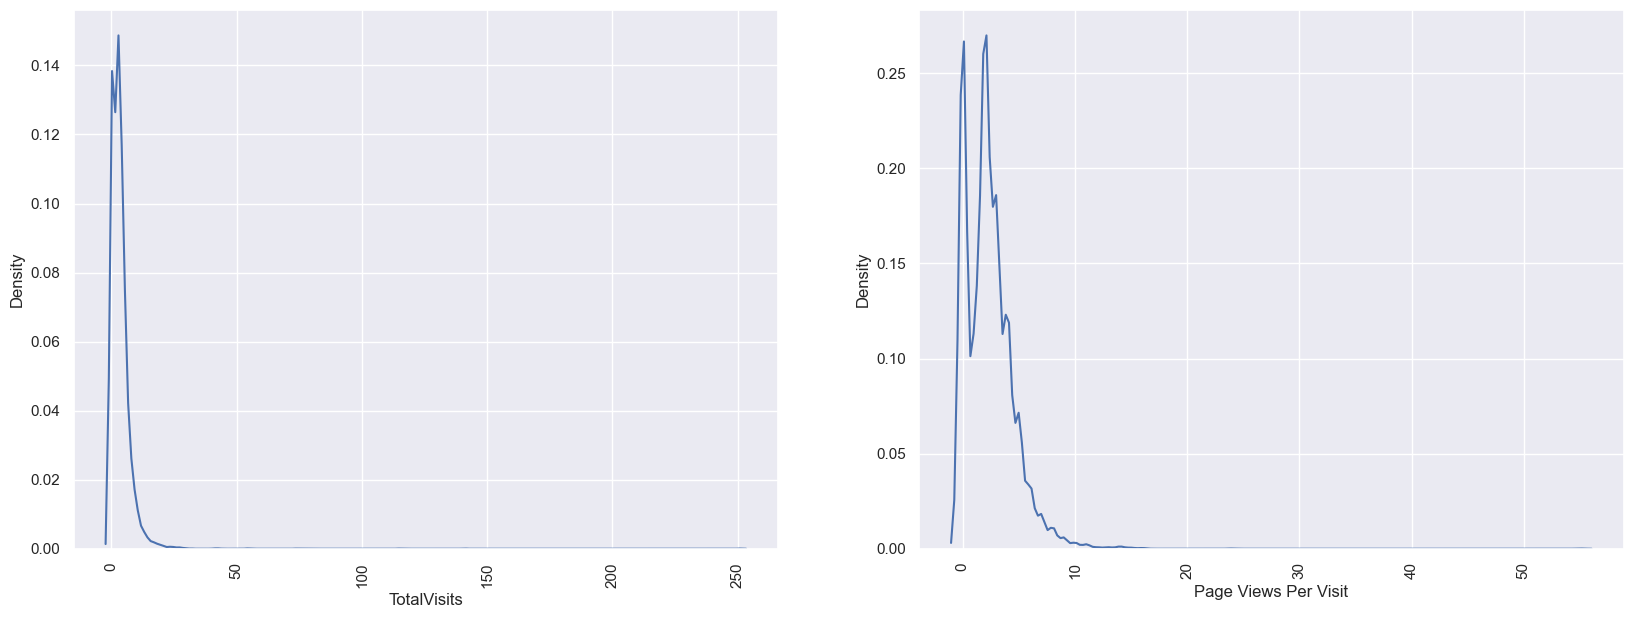

In [29]:
# Plotting a distribution plot

columnsList = ['TotalVisits', 'Page Views Per Visit']
       
plt.figure(figsize = (20,7))
for i in enumerate(columnsList):
    plt.subplot(1,2, i[0]+1)
    ax = sns.distplot(lead[i[1]], hist =False)
    plt.xticks(rotation=90)
    
plt.show()

#### <strong><span style="color:Gold"> Note:</strong>
- Second, we will `impute` the `missing values` of numerical columns `'TotalVisits'` and `'Page Views Per Visit'` with their respectice `mode`.

In [30]:
# TotalVisits missing values to be imputed with mode

lead['TotalVisits'].fillna(lead['TotalVisits'].mode()[0], inplace = True)

In [31]:
# Page Views Per Visit missing values to be imputed with mode

lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mode()[0], inplace = True)

In [32]:
# Re-checking percentage of null values for remaining columns

pd.DataFrame(round(((lead.isnull().mean())*100),2).sort_values(ascending = False))

0
Prospect ID                               0.0
Lead Number                               0.0
A free copy of Mastering The Interview    0.0
I agree to pay the amount through cheque  0.0
Get updates on DM Content                 0.0
Update me on Supply Chain Content         0.0
Receive More Updates About Our Courses    0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Magazine                                  0.0
Search                                    0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
Last Notable Activity                     0.0

#### <strong><span style="color:Magenta"> Inference 5:</strong>
- Missing/null values for all columns have been taken care of.
<hr/>

### <strong><span style="color:green"> 3.3 Dropping Unwanted Columns<strong>
<hr/>

#### <strong><span style="color:teal"> 3.3.1 Handling columns with only one unique value <strong>
<hr/>

In [33]:
# Checking for columns with one unique value and count & freq is same

lead.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Specialization  \
count         9240         9240        9240          9240           9240   
unique          21            2           2            17             19   
top         Google           No          No  Email Opened         Others   
freq          2904         8506        9238          3540           3380   

       What is your current occupation Search Magazine Newspaper Article  \
count                             9240   9240     9240              9240   
unique                               6      2        1                 2   
top                         Unemployed     No       No                No   
freq                              8290   9226     9240              9238   

       X Education Forums Newspaper Digital Advertisement  \
count                9240      9240                  9240   
unique                  2         2                     2   
top                    No        No                    No   
freq                 9239      9239                  9236   

       Through Recommendations Receive More Updates About Our Courses  \
count                     9240                                   9240   
unique                       2                                      1   
top                         No                                     No   
freq                      9233                                   9240   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       I agree to pay the amount through cheque  \
count                                      9240   
unique                                        1   
top                                          No   
freq                                       9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407

#### <strong><span style="color:Gold">Note:</span></strong> 
Following columns have only **`one unique value`**: 
- 'I agree to pay the amount through cheque', 
- 'Get updates on DM Content', 
- 'Update me on Supply Chain Content', 
- 'Receive More Updates About Our Courses', 
- 'Magazine'

These columns are of no use as they have <u>_only one category of response_</u> from customer and can be <strong><span style="color:red">dropped</span></strong>.

In [34]:
# Dropping the above mentioned columns
 
cols_to_drop = ['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                    'Get updates on DM Content','I agree to pay the amount through cheque']

print('Before Dropping Columns', lead.shape)
lead.drop(cols_to_drop, axis = 1, inplace = True)
print('After Dropping Columns', lead.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


#### <strong><span style="color:teal"> 3.3.2 Dropping columns with irrelevant to the model <strong>
<hr/>

#### <strong><span style="color:Gold"> Note:</strong>
- From `Inference 2`, we know that colums like `Prospect ID` and `Lead Number` as all 9240 values are `unique` and dont add any information to the model.
- Column such `Last Notable Activity` do not add in value to the model so they can be <strong><span style = 'color:red'>dropped</strong>.

In [35]:
# Dropping Columns

print("Before Dropping Columns", lead.shape)
lead.drop(['Prospect ID','Lead Number','Last Notable Activity'], axis = 1, inplace = True)
print("After Dropping Columns",lead.shape)

Before Dropping Columns (9240, 21)
After Dropping Columns (9240, 18)


In [36]:
# Re-checking percentage of null values for remaining columns

pd.DataFrame(round(((lead.isnull().mean())*100),2).sort_values(ascending = False))

0
Lead Origin                             0.0
Lead Source                             0.0
Through Recommendations                 0.0
Digital Advertisement                   0.0
Newspaper                               0.0
X Education Forums                      0.0
Newspaper Article                       0.0
Search                                  0.0
What is your current occupation         0.0
Specialization                          0.0
Last Activity                           0.0
Page Views Per Visit                    0.0
Total Time Spent on Website             0.0
TotalVisits                             0.0
Converted                               0.0
Do Not Call                             0.0
Do Not Email                            0.0
A free copy of Mastering The Interview  0.0

In [37]:
# Checking percentage of null values in each row

pd.DataFrame(round(((lead.isnull().mean(axis = 1))*100),2).sort_values(ascending = False)).head(10)

0
0     0.0
6064  0.0
6156  0.0
6157  0.0
6158  0.0
6159  0.0
6160  0.0
6161  0.0
6162  0.0
6163  0.0

#### <strong><span style="color:Magenta"> Inference 6:</strong>
- Missing/null values are not present in any of the rows.
<hr/>

### <strong><span style="color:green"> 3.4 Checking & Dropping Category Columns that are Skewed
<strong>
<hr/>

#### <strong><span style="color:gold">NOTE:</span></strong>
This is similar to the handling of unique values in numerical columns.

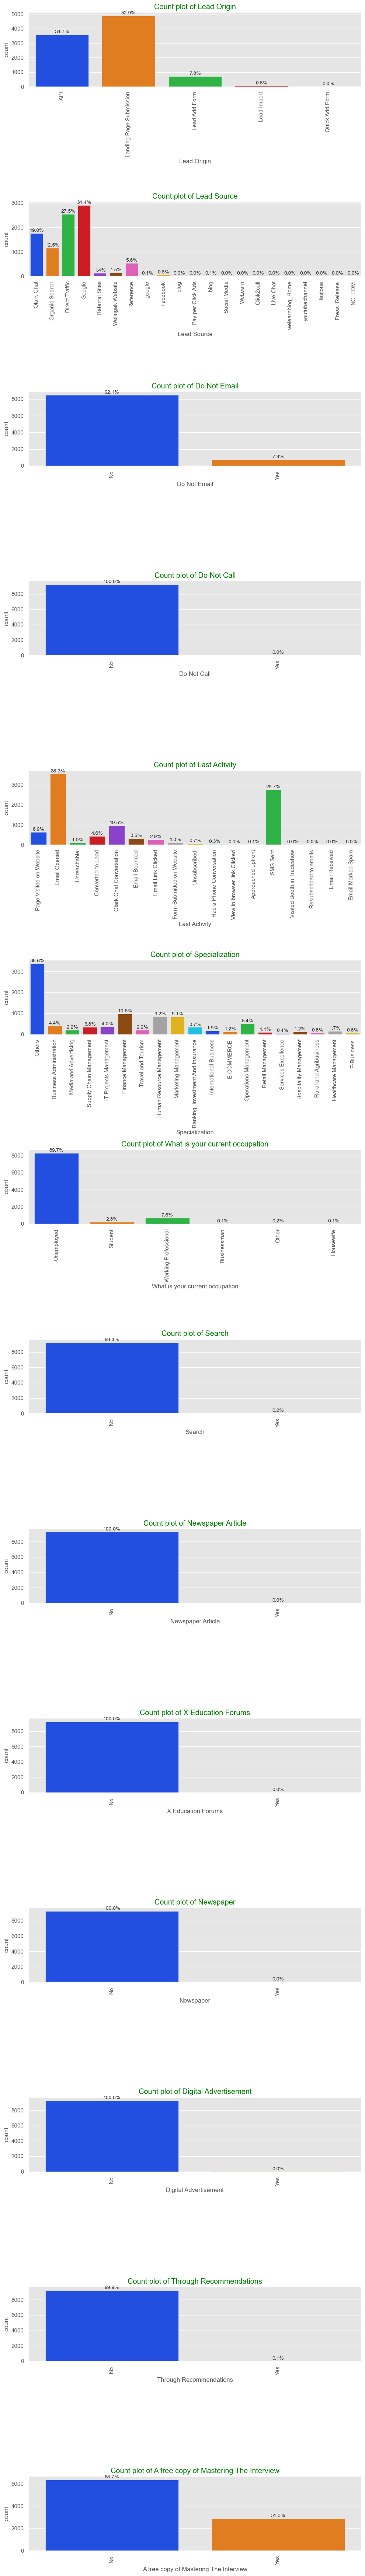

In [38]:
# Select columns that have data types as either category or object and convert to list
columnsList = lead.select_dtypes(include=['category', 'object']).columns.tolist()

# Set the style of the plot and create subplots with the number of rows equal to the length of columnsList
with plt.style.context('ggplot'):
    fig, axs = plt.subplots(nrows=len(columnsList), figsize=[10,5*len(columnsList)])

    # Iterate over each column in columnsList using enumerate function to get both index i and value col
    for i, col in enumerate(columnsList):
        # Calculate total number of records in the current column
        total = len(lead[col])
        
        # Generate a count plot for the current column and set various attributes for the plot like palette, title and x-axis label rotation   
        sns.countplot(x=col, data=lead, palette='bright', ax=axs[i])
        axs[i].set_title("Count plot of {}".format(col), color='green')
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
        
        # Add percentage labels on top of each bar in the current subplot
        for p in axs[i].patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()
            axs[i].annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # Adjust the spacing between subplots to avoid overlapping of labels 
    plt.tight_layout()
    # Display the plots
    plt.show()


#### <strong><span style="color:Magenta"> Inference 7:</strong> 
Following columns have data which is `highly skewed` :
- 'Do Not Call',
- 'Search', 
- 'Newspaper Article',
- 'X Education Forums',
- 'Newspaper', 
- 'Digital Advertisement',
- 'Through Recommendations'. 

Hence these columns will be `dropped` as they will not add any value to the model. Morever, Skewed variables can affect the performance of logistic regression models, as they can `lead to biased` or `inaccurate parameter estimates`.

In [39]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ", lead.shape)
lead.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper',
               'Digital Advertisement','Through Recommendations'], axis = 1, inplace = True)
print("After Drop: ", lead.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [40]:
lead.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

#### <strong><span style="color:Magenta"> Inference 8:</strong> 
- Data is clean from missing values.
- After data is cleaned, we need to `standardise` the values.
<hr/>


### <strong><span style="color:green"> 3.5 Outlier Analysis <strong>
<hr/>

#### <strong><span style="color:teal"> 3.5.1 Numerical Columns Outlier Analysis <strong>
<hr/>

In [41]:
# Checking lead dataframe info
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

### <strong><span style="color:Gold"> Note:</strong>
- Numerical columns are `'TotalVisits','Total Time Spent on Website'` and `'Page Views Per Visit'`.
- `'Converted'` is the target variable.
<hr/>

In [42]:
# Assigning a variable to all the numeric columns

num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [43]:
# Defining a function to check for outliers in specified columns of a dataset
def check_outliers(data, columnList):
    
    # Set the size and spacing of the figure
    plt.figure(figsize = (20, 20))
    plt.subplots_adjust(wspace=0.4,hspace=0.5)
    for i, col in enumerate(columnList):
        plt.subplot(4, 2, i+1)
        sns.boxplot(y = data[col], palette = 'bright')
        
        plt.suptitle("\nChecking Outliers using Boxplot", fontsize = 20, color = "green")
        plt.title(col, fontsize = 15, color = "red")
        plt.xlabel('') # remove x-label
        plt.ylabel(None)  # remove y-label
    
    plt.tight_layout()    # improve spacing
    plt.show()

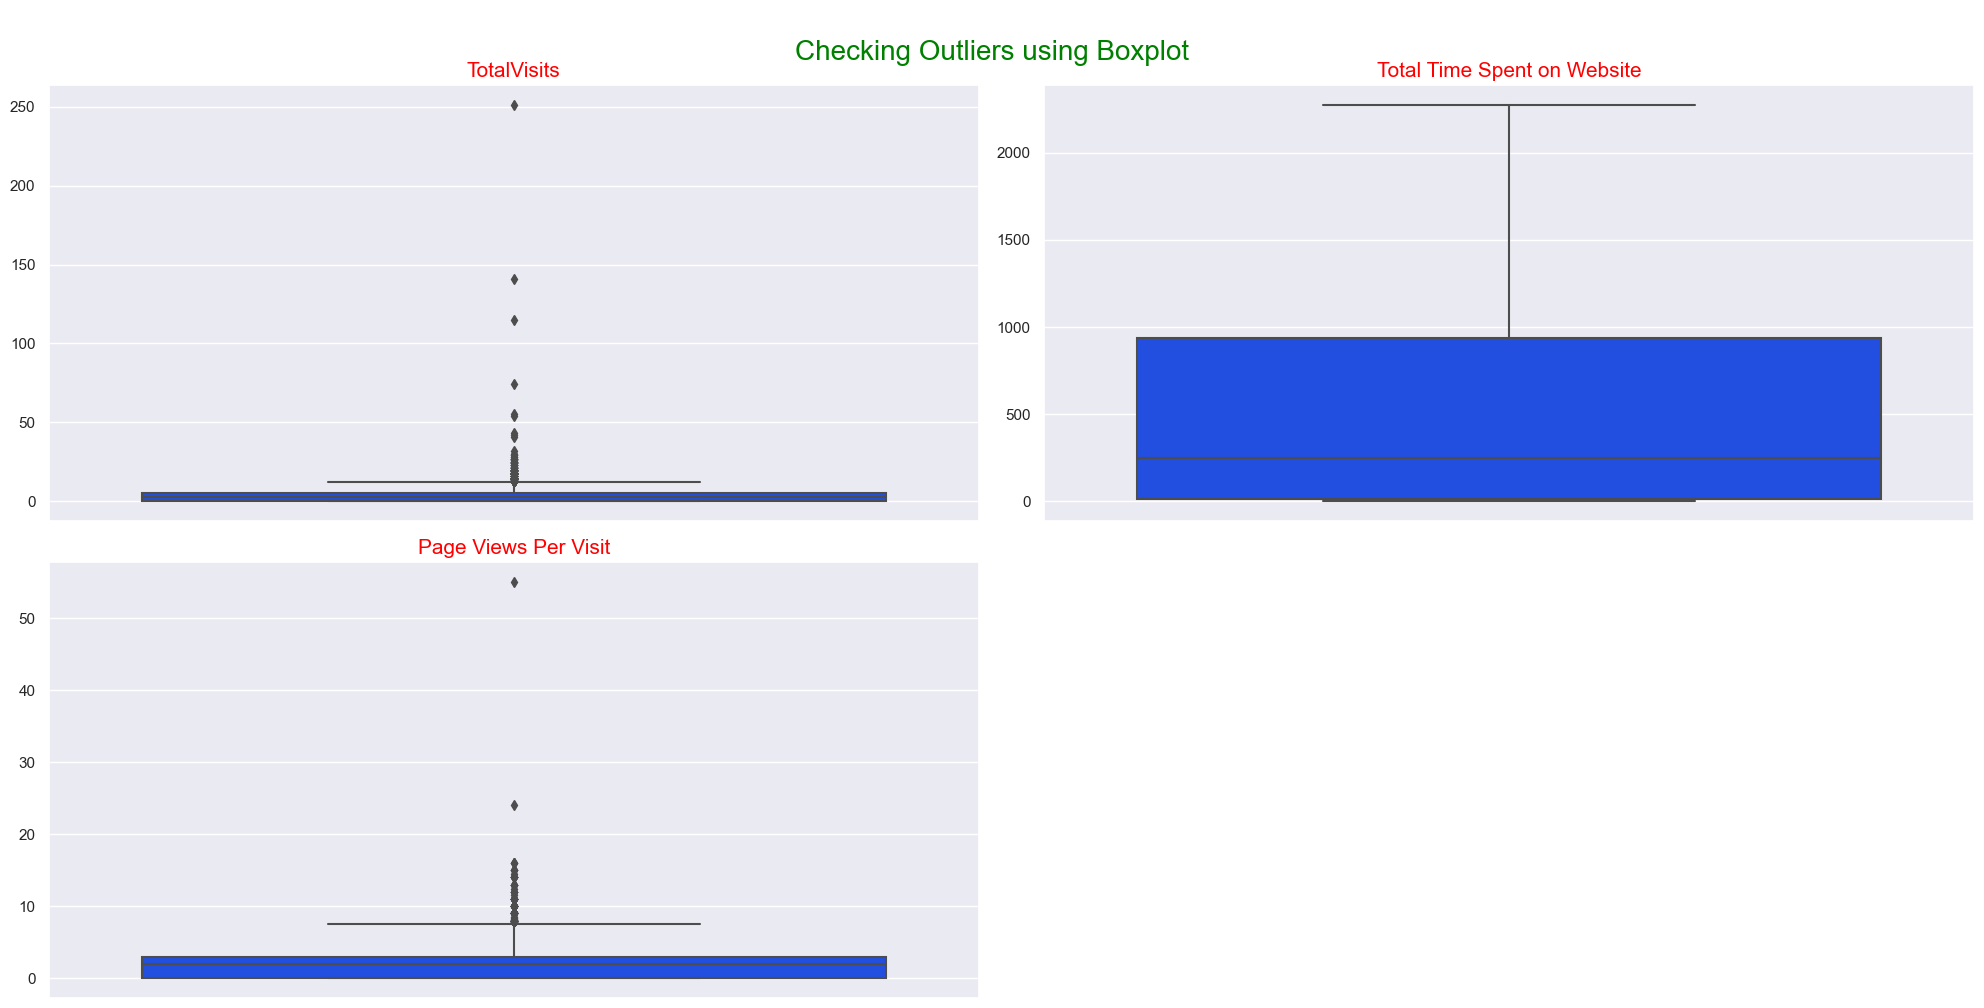

In [44]:
# Checking outliers for numerical variables other than target variable using UDF

check_outliers(lead, num_cols)

#### <strong><span style="color:Magenta"> Inference 9:</strong> 
- Both `"TotalVisits"` and `"Page Views Per Visit"` variables contain outliers as can be seen in the boxplot.
- We need to treat these  outliers before going forward by `Capping` and `Flooring`.
<hr/>

In [45]:
# before outlier treatment

lead.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.394156                   487.698268   
std       0.486714     4.836682                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.327787  
std                2.164258  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max               55.000000

In [46]:
# Assigning a variable to the outlier columns
outlier_cols = ['TotalVisits', 'Page Views Per Visit']

#### <strong><span style="color:Gold"> Outlier Treatment using Capping </span></strong> 

In [47]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_Cap(df, columnList):
    
    # Looping through each column in columnList
    for i in columnList:
        
        # Calculating the 1st quartile
        q1 = df[i].describe()["25%"]
        
        # Calculating the 3rd quartile
        q3 = df[i].describe()["75%"]
        
        # Calculating the Interquartile Range
        IQR = q3 - q1

        # Calculating upper and lower outlier boundaries
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR
        
        # Capping the upper boundary
        df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])
        
        # Flooring the lower boundary
        df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])


In [48]:
# Using UDF to treat outliers

Outlier_Cap(lead, outlier_cols)

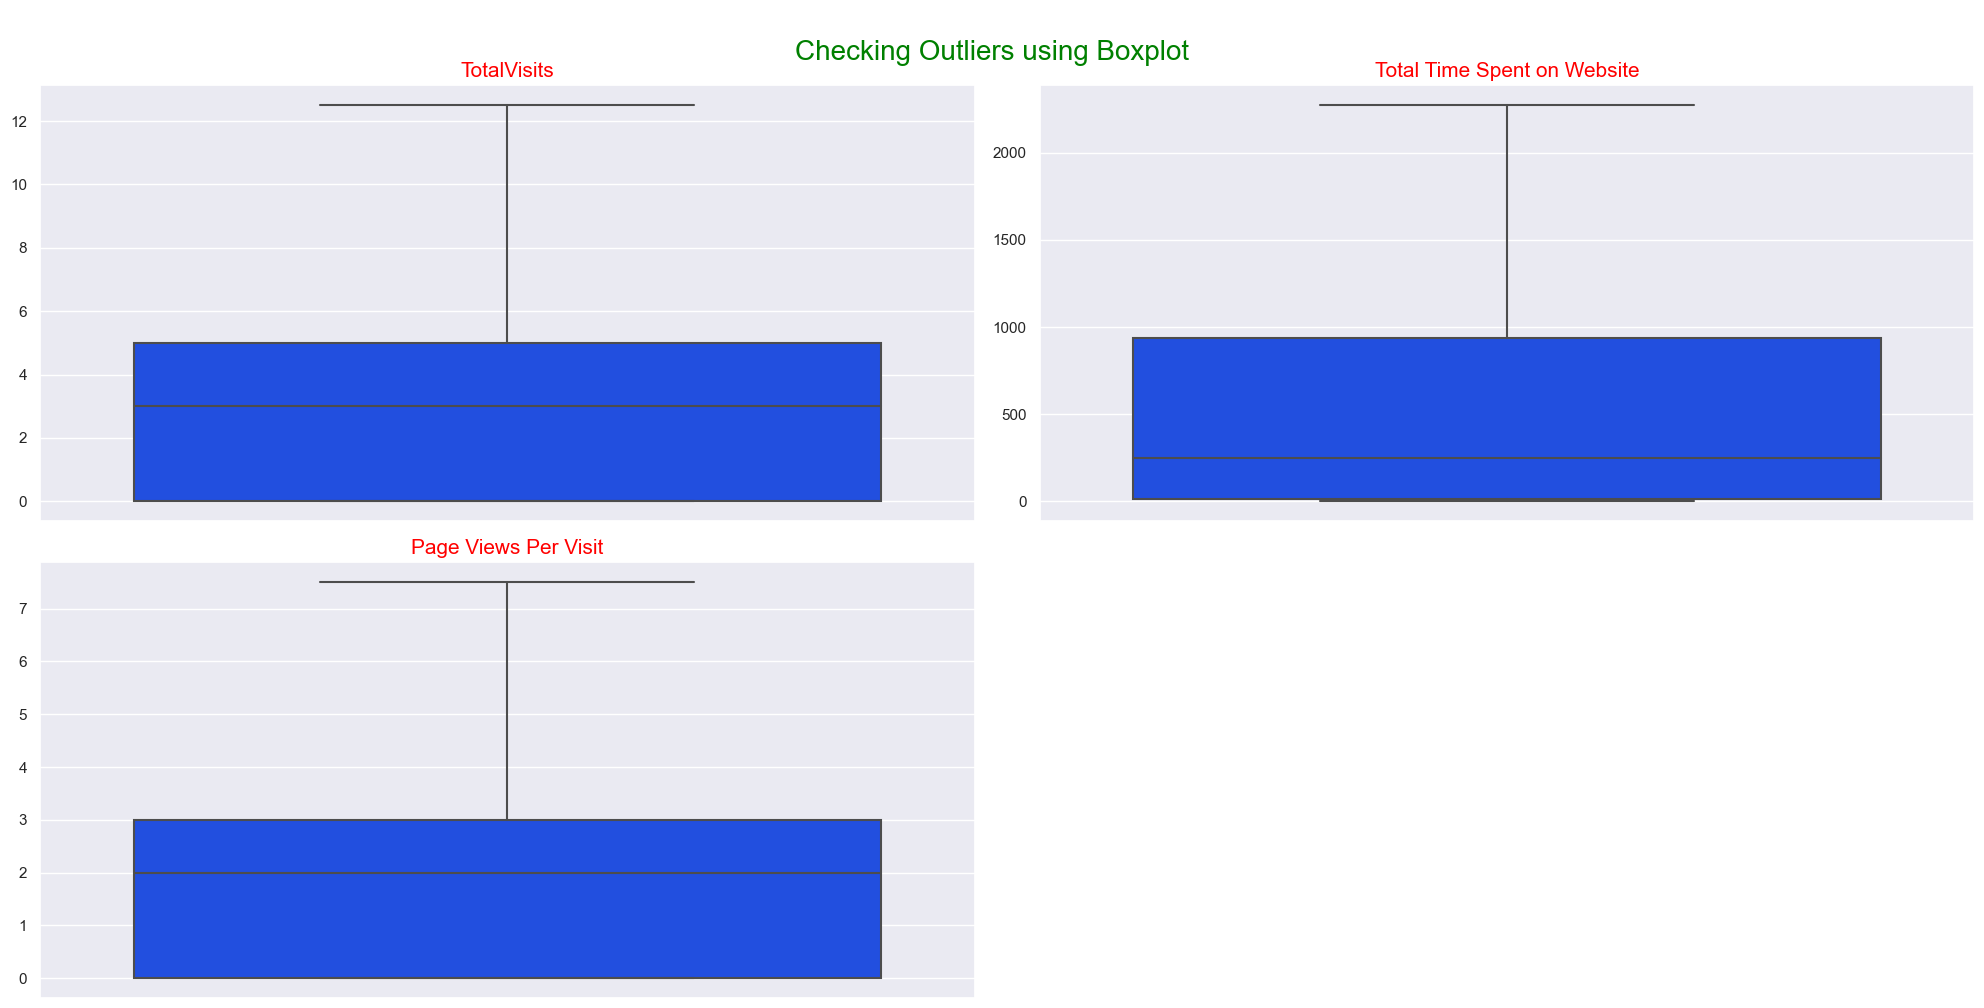

In [49]:
# Checking boxplot of num_cols using UDF after Outlier treatment

check_outliers(lead, num_cols)

In [50]:
# Checking percentile values after outlier treatment

lead.describe(percentiles=[.10,.25,.50,.75,.95])

Converted  TotalVisits  Total Time Spent on Website  \
count  9240.000000  9240.000000                  9240.000000   
mean      0.385390     3.213853                   487.698268   
std       0.486714     3.005136                   548.021466   
min       0.000000     0.000000                     0.000000   
10%       0.000000     0.000000                     0.000000   
25%       0.000000     0.000000                    12.000000   
50%       0.000000     3.000000                   248.000000   
75%       1.000000     5.000000                   936.000000   
95%       1.000000    10.000000                  1562.000000   
max       1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
10%                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
95%                6.000000  
max                7.500000

#### <strong><span style="color:Magenta"> Inference 10:</strong> 
- Using `Capping` and `Flooring` we have managed to remove the `outliers` from `numerical` columns.
<hr/>

### <strong><span style="color:green"> 3.6 Data Standardization & Fixing Invalid Values <strong>
<hr/>

#### <strong><span style="color:Gold"> Note:</strong>
- Checking if entries in data are in `correct format` or not , `casing styles` (UPPER,lower).
- Checking `data types` of columns.
<hr/>

In [51]:
lead.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

In [52]:
lead.tail()

Lead Origin     Lead Source Do Not Email  Converted  \
9235  Landing Page Submission  Direct Traffic          Yes          1   
9236  Landing Page Submission  Direct Traffic           No          0   
9237  Landing Page Submission  Direct Traffic          Yes          0   
9238  Landing Page Submission          Google           No          1   
9239  Landing Page Submission  Direct Traffic           No          1   

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
9235          8.0                         1845                  2.67   
9236          2.0                          238                  2.00   
9237          2.0                          199                  2.00   
9238          3.0                          499                  3.00   
9239          6.0                         1279                  3.00   

          Last Activity             Specialization  \
9235  Email Marked Spam     IT Projects Management   
9236           SMS Sent      Media and Advertising   
9237           SMS Sent    Business Administration   
9238           SMS Sent  Human Resource Management   
9239           SMS Sent    Supply Chain Management   

     What is your current occupation A free copy of Mastering The Interview  
9235                      Unemployed                                     No  
9236                      Unemployed                                    Yes  
9237                      Unemployed                                    Yes  
9238                      Unemployed                                     No  
9239                      Unemployed                                    Yes

In [53]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [54]:
# Assigning a variable to the remaining categorical columns

cat_columns = lead.select_dtypes(include=['object']).columns.tolist()

In [55]:
cat_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview']

#### <strong><span style="color:Gold"> Note:</strong> 
First, we are going to check the `value_counts` in each `categorical column`.
<hr/>

In [56]:
# Iterate through each column in the list
for col in cat_columns:
    # Calculate the percentage of value counts for each column using pandas' value_counts() and normalize parameters
    perc = round(100 * lead[col].value_counts(normalize = True), 2)
    
    # Print a message with the name of the column being analyzed
    print(f"value_counts % for: {col}\n")
    
    # Print the percentage values for each unique value in the column
    print(f"{perc}\n")
    
    # Print a separator line to make it easier to distinguish between different columns
    print("__|__" * 40, "\n")

value_counts % for: Lead Origin

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

__|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|__ 

value_counts % for: Lead Source

Google               31.43
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog              

#### <strong><span style="color:Magenta"> Inference 11:</strong> 
- Some `categories/values` in the **`'Lead Source'`** and **`'Last Activity'`** columns have very few `counts/records` although the total number of unique records are quit high. For these variables we can create dummy variables and group them together under "Others" category to reduce the dimensionality of the dataset.

- In the `'Lead Source'` column, `"Google"` & `"google"` are same, so we will standardise the case.

- There are 2 columns `'Do Not Emails'` and `'A free copy of Mastering The Interview'` which have only binary values which can be `binary encoded`.

- The columns `'A free copy of Mastering The Interview'` and `'What is your current occupation'` have large names which can be shortened.
<hr/>

#### <strong><span style="color:teal"> 3.6.1 Grouping Low frequency values <strong>
<hr/>

In [57]:
# Grouping low frequency value levels to Others
lead['Lead Source'] = lead['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")


In [58]:
# Grouping low frequency value levels to Others 
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

#### <strong><span style="color:teal"> 3.6.2 Standardising Case of Google <strong>
<hr/>

In [59]:
# Changing google to Google
lead['Lead Source'] = lead['Lead Source'].replace("google","Google")


#### <strong><span style="color:teal"> 3.6.3 Shortening Column Names <strong>
<hr/>

In [60]:
# Renaming column 'A free copy of Mastering The Interview' to 'Free_Copy'
lead.rename(columns = {'A free copy of Mastering The Interview': 'Free_Copy'}, inplace=True)

# Renaming column 'What is your current occupationA free copy of Mastering The Interview' to 'Current_Occupation'
lead.rename(columns = {'What is your current occupation': 'Current_Occupation'}, inplace=True)
lead.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_Occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

  Free_Copy  
0        No  
1        No  
2       Yes  
3        No  
4        No

#### <strong><span style="color:teal"> 3.6.4 Binary Encoding Categorical Columns <strong>
<hr/>

In [61]:
# Mapping binary categorical variables (Yes/No to 1/0) 
lead['Do Not Email'] = lead['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

lead['Free_Copy'] = lead['Free_Copy'].apply(lambda x: 1 if x =='Yes' else 0)
lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_Occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_Copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [62]:
lead['Do Not Email'].value_counts(normalize=True)*100

0    92.056277
1     7.943723
Name: Do Not Email, dtype: float64

In [63]:
# Assigning a variable to the updated categorical columns

cat_columns2 = lead.select_dtypes(include=['object']).columns.tolist()
cat_columns2

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Current_Occupation']

In [64]:
# After Data Standardization

for col in cat_columns2:
    # Calculate the percentage of value counts for each column using pandas' value_counts() and normalize parameters
    perc = round(100 * lead[col].value_counts(normalize = True), 2)
    
    # Print a message with the name of the column being analyzed
    print(f"value_counts % for: {col}\n")
    
    # Print the percentage values for each unique value in the column
    print(f"{perc}\n")
    
    # Print a separator line to make it easier to distinguish between different columns
    print("__|__" * 40, "\n")

value_counts % for: Lead Origin

Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

__|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|__ 

value_counts % for: Lead Source

Google              31.48
Direct Traffic      27.52
Olark Chat          18.99
Organic Search      12.49
Reference            5.78
Welingak Website     1.54
Referral Sites       1.35
Facebook             0.60
Others               0.25
Name: Lead Source, dtype: float64

__|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|__ 

value_counts % for: Last Activity

Email Opened            

In [65]:
# Assigning a variable to the updated categorical columns

num_columns2 = lead.select_dtypes(include=['int64','float64']).columns.tolist()
num_columns2

['Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Free_Copy']

In [66]:
# After Data Standardization

for col in num_columns2:
    # Calculate the percentage of value counts for each column using pandas' value_counts() and normalize parameters
    perc = round(100 * lead[col].value_counts(normalize = True), 2)
    
    # Print a message with the name of the column being analyzed
    print(f"value_counts % for: {col}\n")
    
    # Print the percentage values for each unique value in the column
    print(f"{perc}\n")
    
    # Print a separator line to make it easier to distinguish between different columns
    print("__|__" * 40, "\n")

value_counts % for: Do Not Email

0    92.06
1     7.94
Name: Do Not Email, dtype: float64

__|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|__ 

value_counts % for: Converted

0    61.46
1    38.54
Name: Converted, dtype: float64

__|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|__ 

value_counts % for: TotalVisits

0.0     25.17
2.0     18.18
3.0     14.13
4.0     12.12
5.0      8.47
6.0      5.04
1.0      4.27
7.0      3.34
8.0      2.42
12.5     2.40
9.0      1.77
10.0     1.23
11.0     0.93
12.0     0.49
Name: TotalVisits, dtype: float64

__|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____|____

In [67]:
# Checking Dataypes of all the columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_Occupation           9240 non-null   object 
 10  Free_Copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


#### <strong><span style="color:Magenta"> Inference 12:</strong> 
- The data types appear to be suitable and no modifications are necessary.

- We can start with the `EDA`.
<hr/>

## <strong><span style="color:cyan"> Step 4: Exploratory Data Analysis (EDA) <strong>
<hr/>

### <strong><span style="color:green"> 4.1 Checking if Data is Imbalanced or not <strong>
<hr/>

#### <strong><span style="color:Gold"> Note:</strong>
- Data is imbalanced when one value is present in `majority` and other is in `minority` meaning an `uneven distribution` of observations in dataset.
- `Data imbalance` is in the context of `Target variable` only
- `Target variable` is `'Converted'` which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted
<hr/>

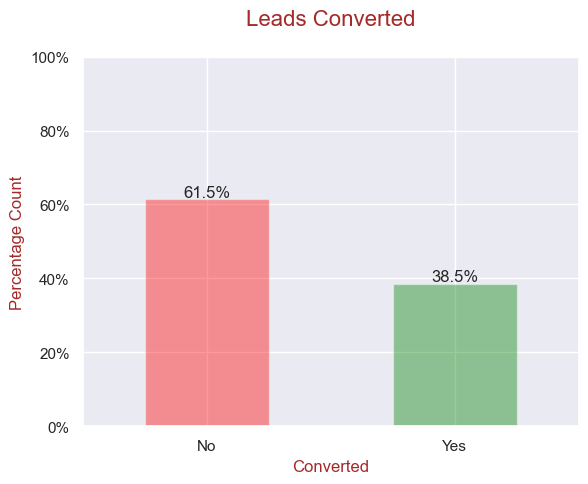

In [68]:
# plotting the Data Imbalance results on bar plot
ax = lead["Converted"].value_counts(normalize=True).mul(100).plot.bar(color=["Red","Green"],alpha=0.4)

# Adding and formatting title, x and y-axis labels
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Brown'})
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=[f"{i:.0f}%" for i in ticks]
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

# annotating text on each bar segment
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()


In [69]:
# Ratio of Data Imbalance

value_counts = lead['Converted'].value_counts(normalize=True)
ratio_imb = value_counts[0] / value_counts[1]
print(f"Data Imbalance Ratio: {ratio_imb:.2f} : 1")

Data Imbalance Ratio: 1.59 : 1


#### <strong><span style="color:Magenta"> Inference 13:</strong> 
- The `Data Imbalance Ratio` is `1.59 : 1`.

- **`Conversion rate is of 38.5%`**, meaning only 38.5% of the people have been converted to actual leads.(`Minority`)

- While `61.5%` of the people didn't convert to customers. (`Majority`)
<hr/>

### <strong><span style="color:green"> 4.2 Univariate Analysis <strong>
<hr/>

#### <strong><span style="color:Gold"> Note: </span></strong> 
- We can use pandas profiling or y-data profiling to do EDA on the whole dataset and visualize the dataset as well.

In [70]:
# importing the libraries

from ydata_profiling import ProfileReport

In [71]:
# Performing EDA

profile = ProfileReport(lead, title = 'Lead Scoring EDA', explorative = True)


profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### <strong><span style="color:Gold"> Note:</strong>
- The above EDA is good enough to draw inferences for univariate analysis.

- In `Categorical Univariate Analysis`, we get to know the value counts percentage of each variable of every feature and what is the distribution of values in each column.

- With this we get some understanding that which variables can be used in `Bivariate Analysis`.

#### <strong><span style="color:Magenta"> Inference 14:</strong> 
- <strong><span style="color:Purple">Lead Origin:</span></strong> The majority of customers, `52.9%`, were identified through `'Landing Page Submission'` as the lead origin, followed by `'API'` at `38.7%`.

- <strong><span style="color:Purple">Current_occupation:</span></strong> A significant proportion of customers, `89.7%`, are `unemployed` based on the current occupation information.

- <strong><span style="color:Purple">Do Not Email:</span></strong> A large proportion of customers, `92.1%`, `do not want to receive emails` about the course.

- <strong><span style="color:Purple">Lead Source:</span></strong> The primary lead source is `Google` at `31.5%`, followed by `Direct Traffic` at `27.5%`. So these two contribute to almost `58%` of `customer traffic`.

- <strong><span style="color:Purple">Last Activity:</span></strong> `Email` is the most common last activity, with `38.3%` of customers having opened an email, and `29.7%` having sent an `SMS`. 

- <strong><span style="color:Purple">Specialization:</span></strong> The `'Others'` specialization category is the most common among customers at `36.6%`, followed by `Finance Management` at `10.6%`,  `HR Management` at `9.2%`, `Marketing Management` at `9.1%`, and `Operations Management` at `5.4%`.
<hr/>

### <strong><span style="color:green"> 4.3 Bivariate Analysis <strong>
<hr/>

#### <strong><span style="color:Gold"> Note:</strong>
- `Bivariate analysis` is a statistical method examining how two different things are related. It aims to determine if there is a statistical link between the `two variables`.

- Using the points from `inference 13`, we can compare them against `Lead Convsersion Rates (LCR)`.

#### <strong><span style="color:teal"> 4.3.1 Bivariate Analysis of Categorical Columns <strong>
<hr/>

In [72]:
# Define a function that takes in a dataframe, variable name and target column
# Optional arguments include figsize, Target and palette

def BiVarAnalysis(dataframe , var_name, Target="Converted", figsize=(20,6), palette="mako"):
    # Create a figure with specific size
    plt.figure(figsize=figsize)
    
    # Add the main title to the plot
    plt.suptitle(f"Lead Conversion Rate of {var_name}", color="red", fontsize=18)

    # Create a countplot using seaborn library and assign to ax variable
    ax = sns.countplot(x=var_name, hue=Target, data=dataframe, palette=palette)
    
    # Rotate x-axis ticks by 90 degrees for better readability
    plt.xticks(rotation=90)
    
    # Add y-axis label
    plt.ylabel("Count", color='brown')
    
    # Add x-axis label with the variable name
    plt.xlabel(var_name)
    
    # Add legend labels and title
    plt.legend(labels=["Not Converted", "Converted"], title="Lead Conversion Rate")

    # Get the height of each bar in all groups
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    
    # Annotate each bar with its percentage value
    [ax.annotate(f"{(100 * p.get_height() / total) :.1f}%", (p.get_x()+p.get_width()/2,p.get_height()), size=11, ha='center', va='bottom') for bars in ax.containers for i, p in enumerate(bars) if (total := sum(xgroup[i] for xgroup in all_heights))]


In [73]:
cat_var_cols = ["Lead Origin","Current_Occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_Copy"]

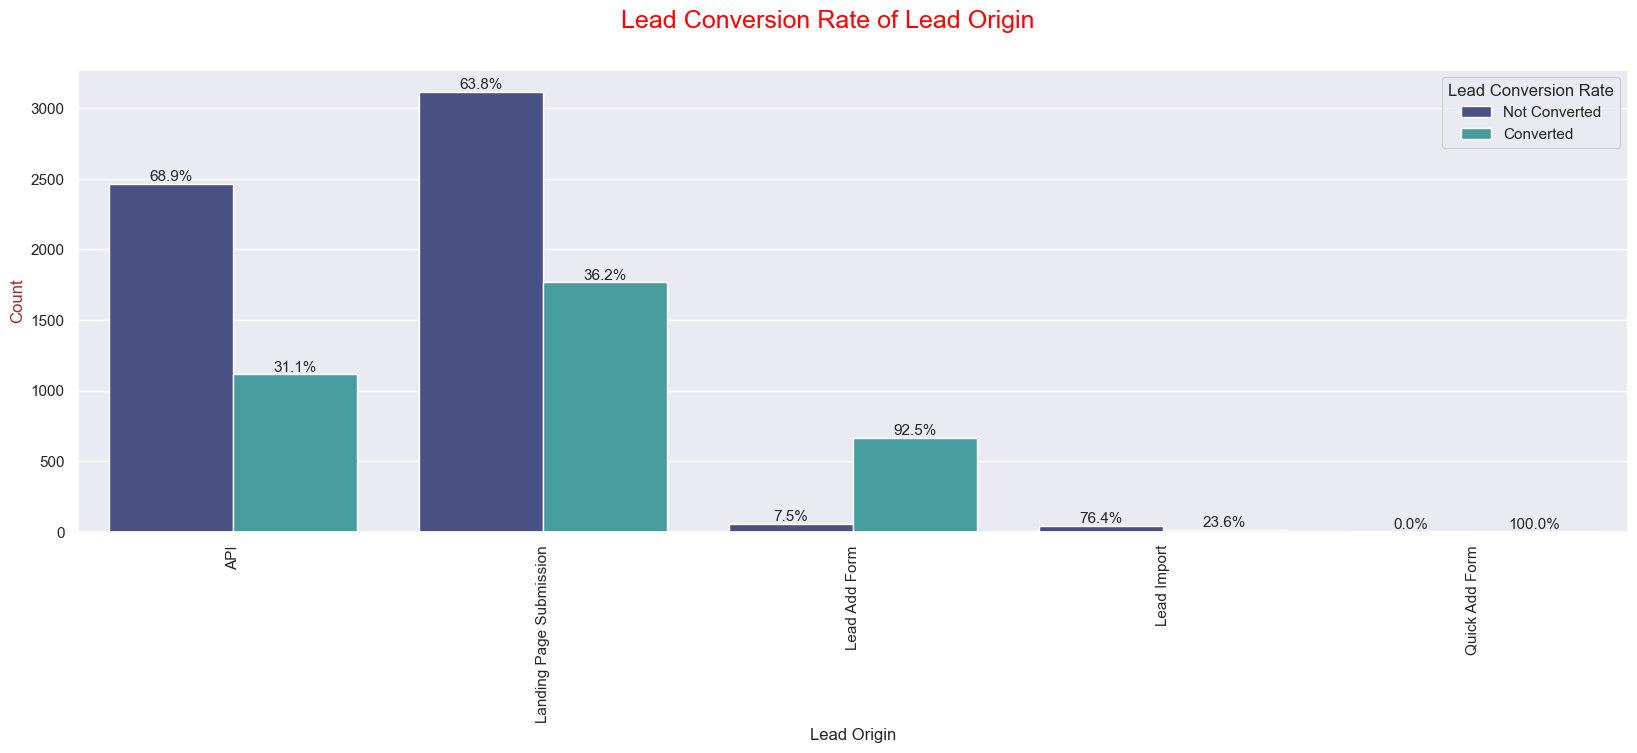

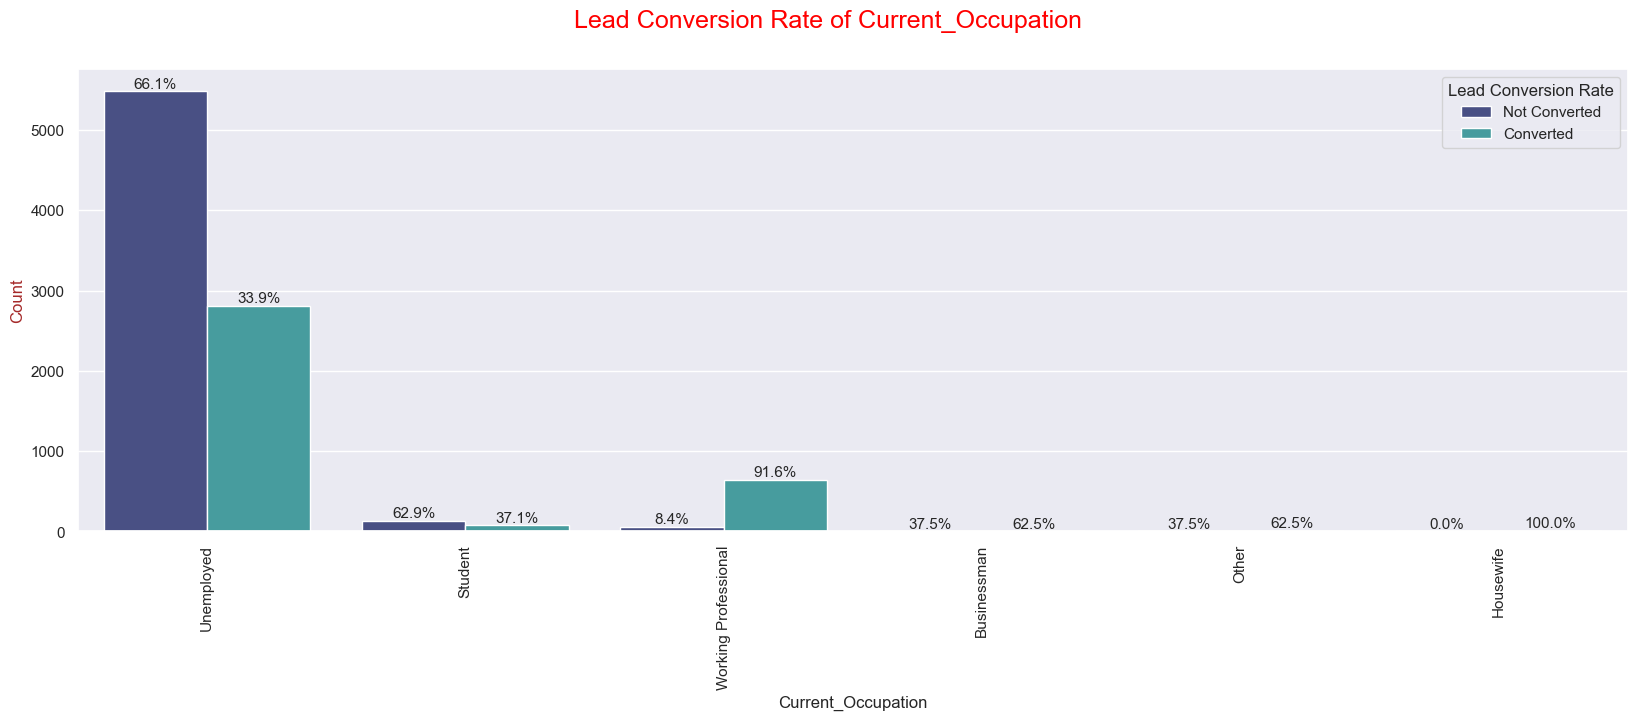

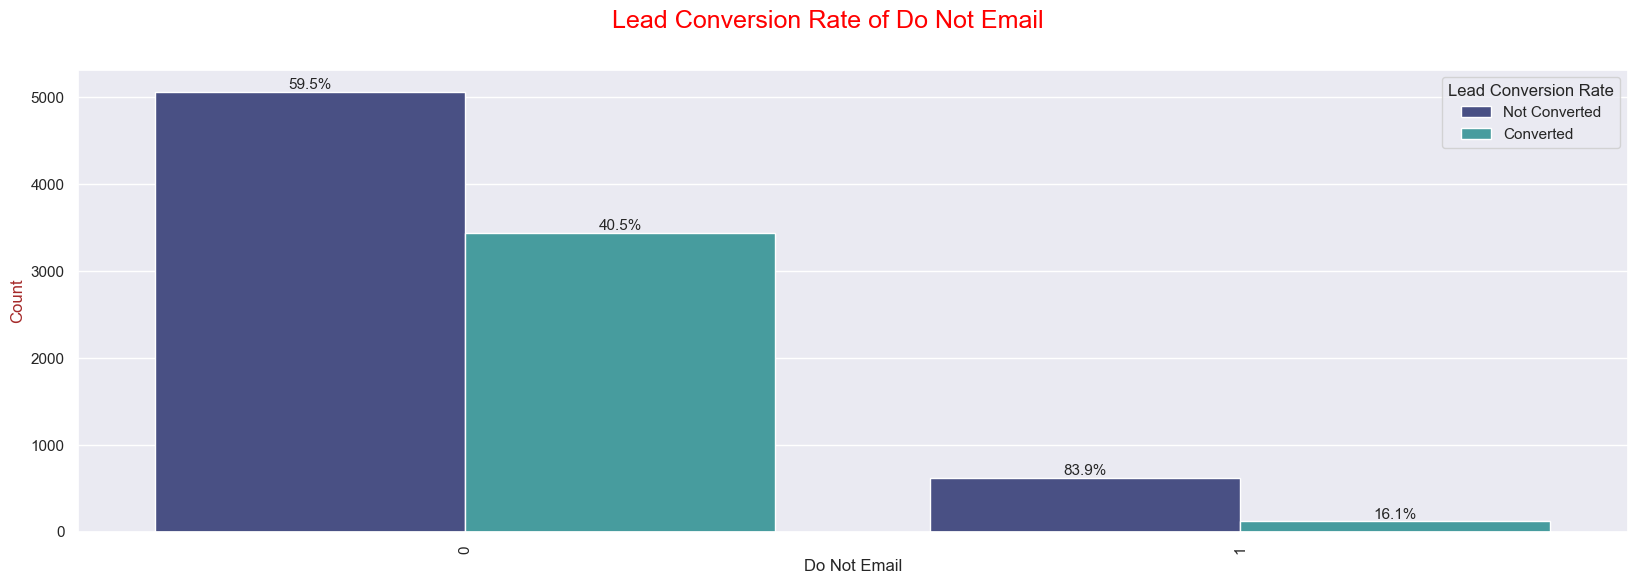

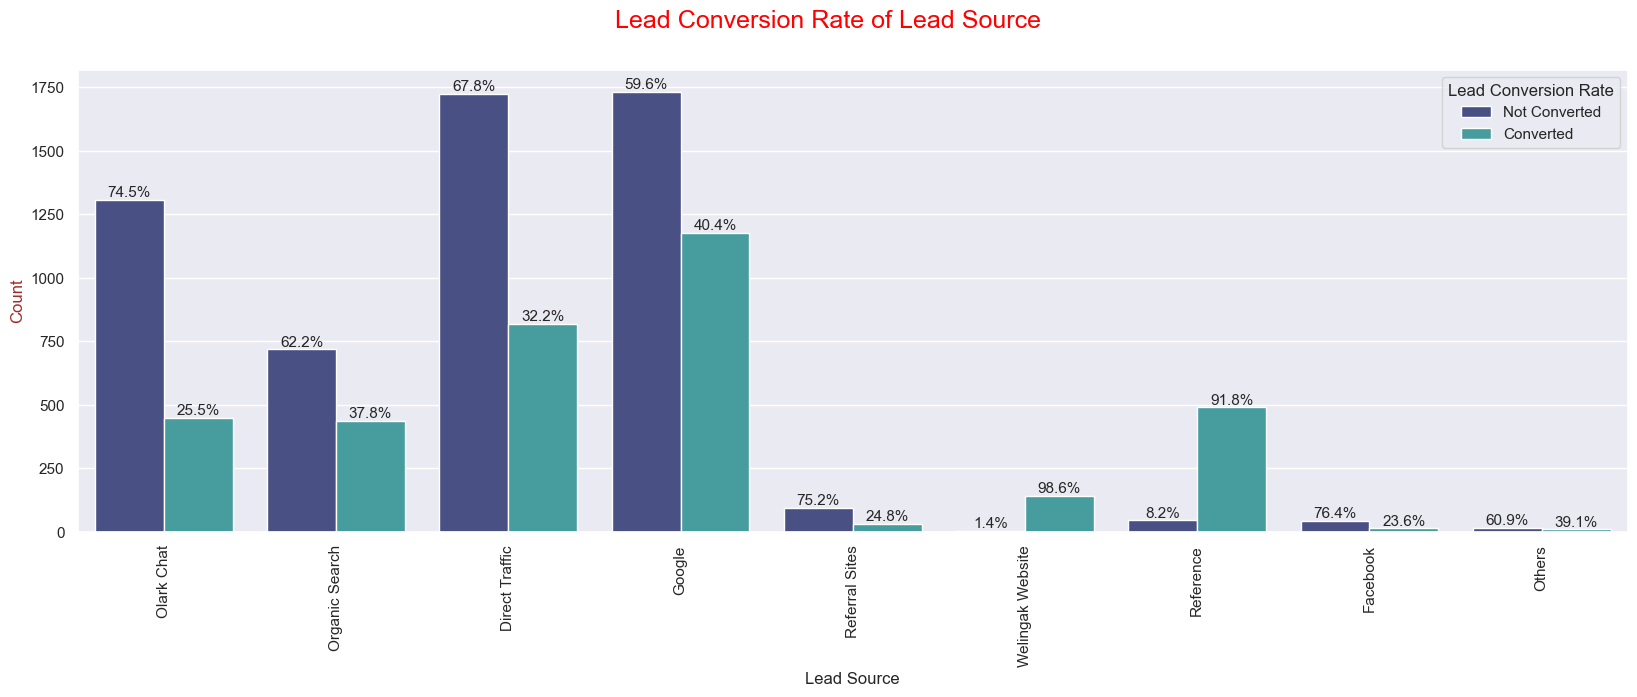

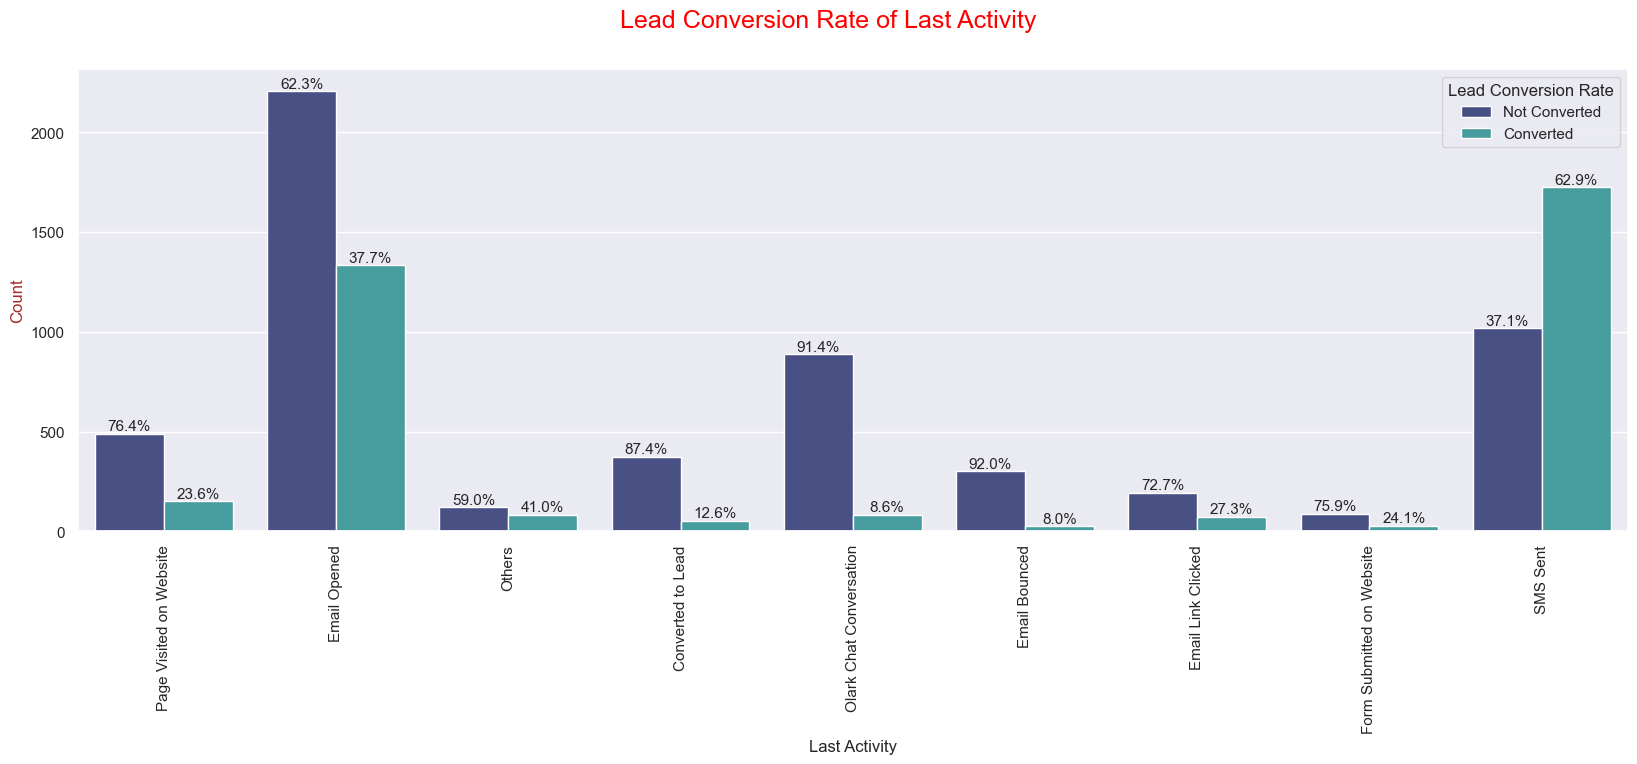

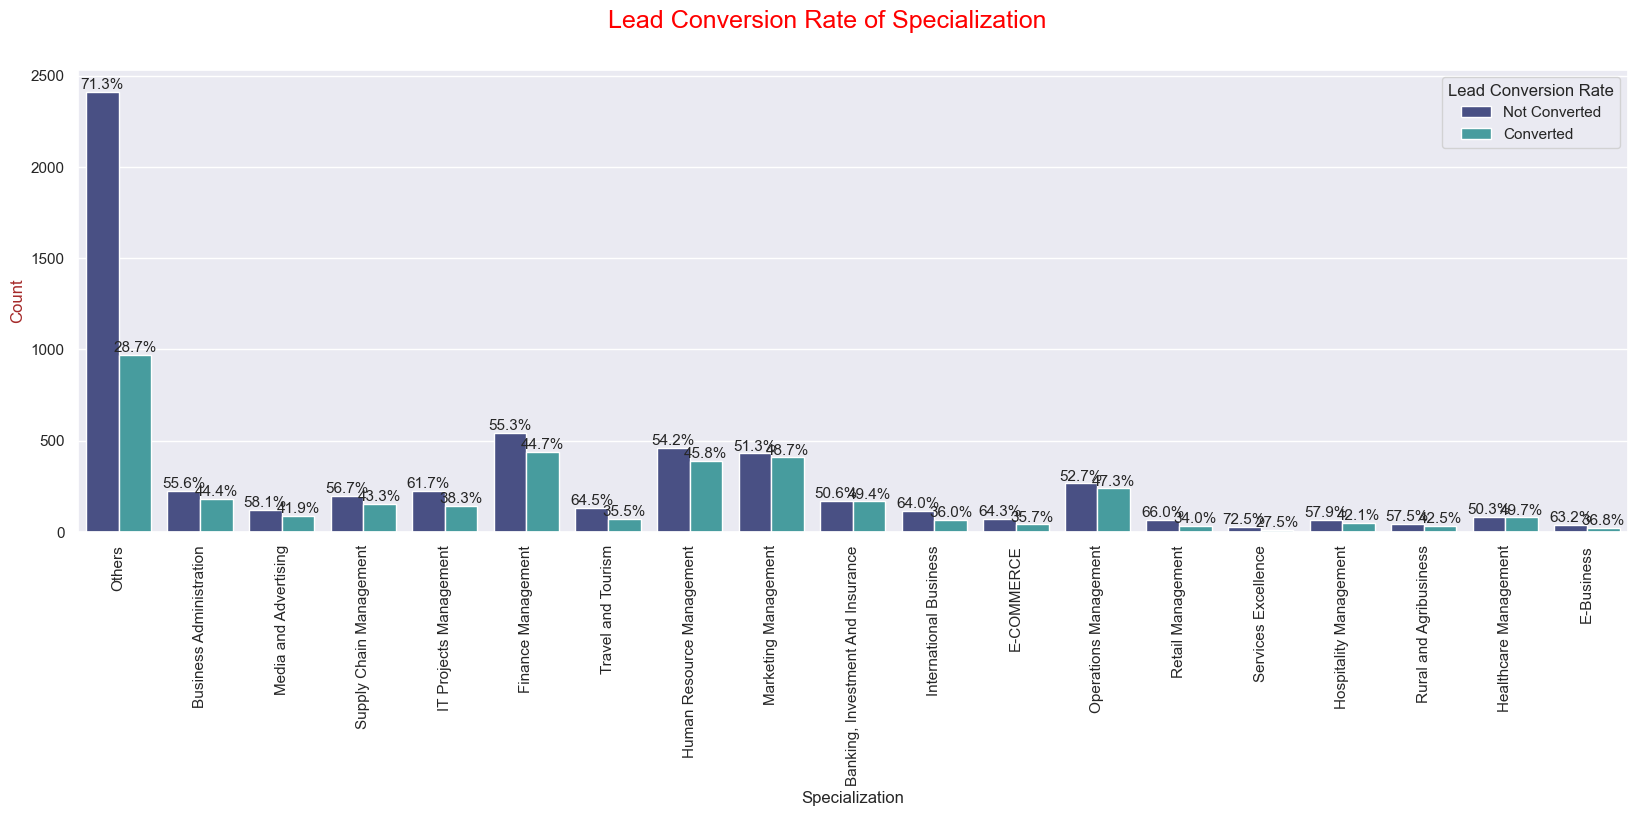

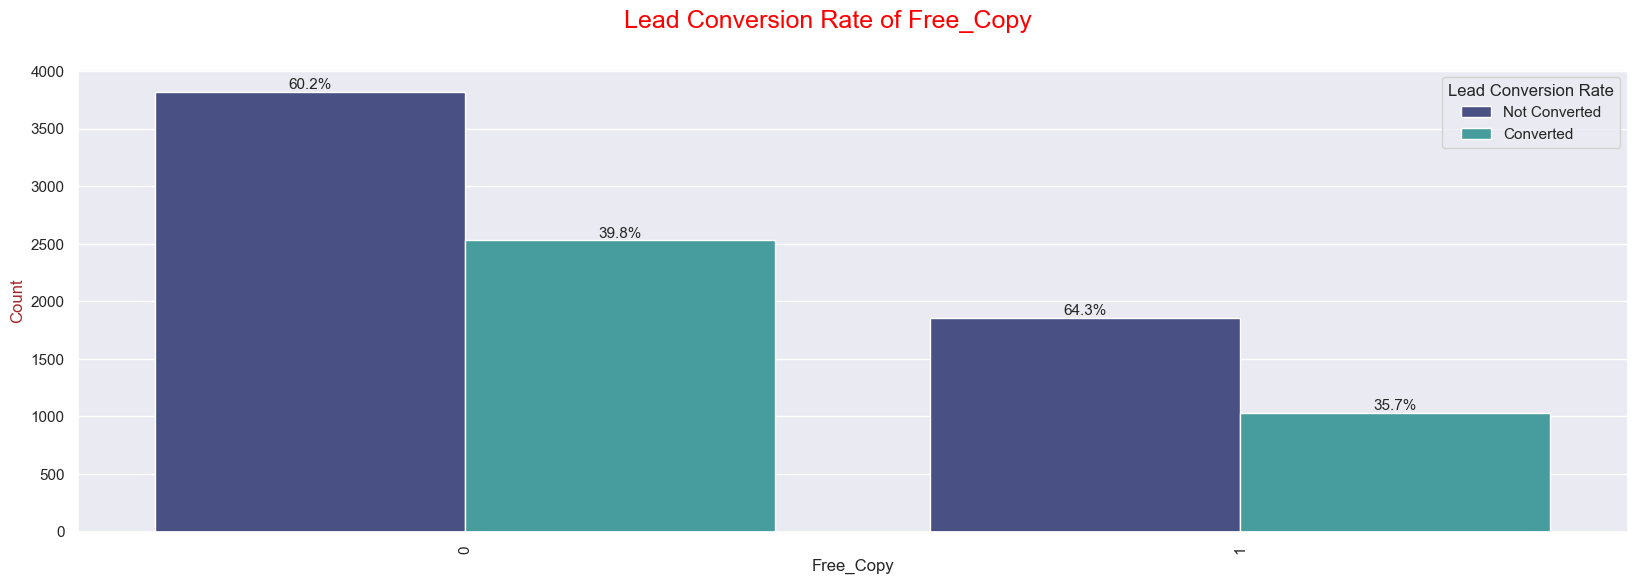

In [74]:
# Bivariate Analysis for the above variables variables using loop and UDF
# Comparision of each variable w.r.t the target variable 'Converted' 

for i in cat_var_cols:
    BiVarAnalysis(lead, var_name = i)

#### <strong><span style="color:Magenta"> Inference 15:</strong> 
- <strong><span style="color:Purple">Lead Origin:</span></strong> The majority of customers, `52.9%`, which were identified through `'Landing Page Submission'` as the lead origin, have a `LCR` of `36.2%` followed by `'API'` at `38.7%`, with an `LCR` of `31.1%`.

- <strong><span style="color:Purple">Current_occupation:</span></strong> A significant proportion of customers, `89.7%`, are `unemployed` but have a smaller `LCR` of `34%` when compared to `Working Professionals` which are only `7.6%` of the total customers but have an `LCR` of `92%`.

- <strong><span style="color:Purple">Do Not Email:</span></strong> A large proportion of customers, `92.1%`, `do not want to receive emails` about the course but have an `LCR` of `40.5%`.

- <strong><span style="color:Purple">Lead Source:</span></strong> `Google` is the most effective Lead Source with an `LCR` of `40.4%`, followed by `Direct Traffic` at `32.2%` and `Organic Search` at `37.8%` (contributing to only `12.5%` of `customers`). `Reference` has the `highest LCR` at `91.8%`, but there are `only 5.8% of customers` through this Lead Source.

- <strong><span style="color:Purple">Last Activity:</span></strong> `SMS Sent` and `Email Opened` are the most effective Last Activity types with `LCRs` of `62.9%` and `37.7%` respectively. 

- <strong><span style="color:Purple">Specialization:</span></strong> `Marketing Management`, `HR Management`, `Finance Management` and `Operations Management` all show `good LCRs`, indicating a strong interest among customers in these specializations.

#### <strong><span style="color:Gold"> Note:</strong>
- <strong><span style="color:Gold"> LCR:</strong> Lead Conversion Rate.
<hr/>

#### <strong><span style="color:teal"> 4.3.2 Bivariate Analysis of Numerical Columns <strong>
<hr/>

In [75]:
num_var_cols = ['Converted', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

<Figure size 1600x400 with 0 Axes>

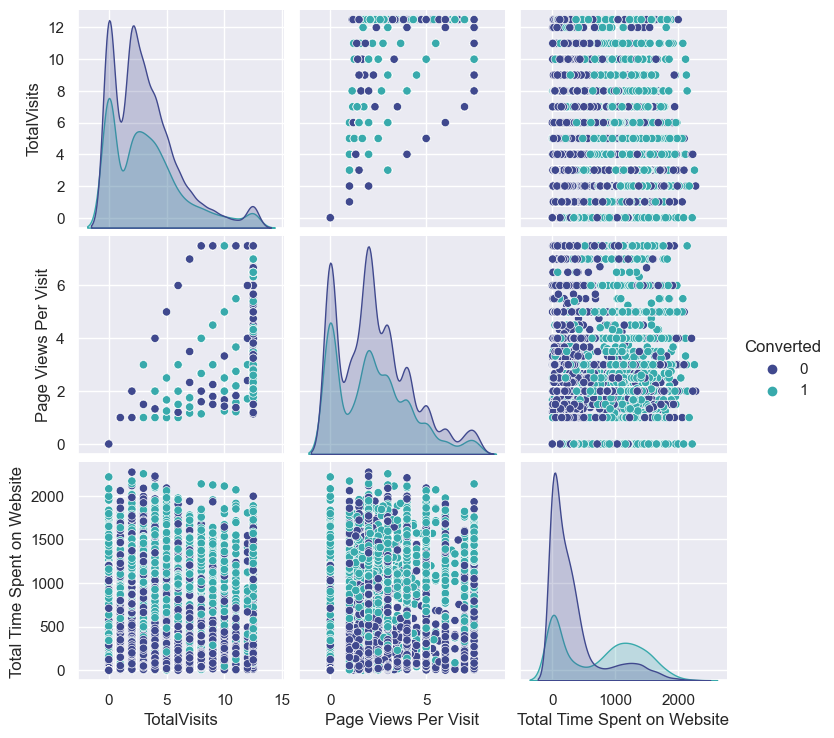

In [76]:
# Pairplot of Numerical Variables

plt.figure(figsize = (16, 4))
sns.pairplot(data = lead, vars = num_var_cols[1:], 
             hue = "Converted", palette = "mako")  # vars excluding the target variable                                
plt.show()

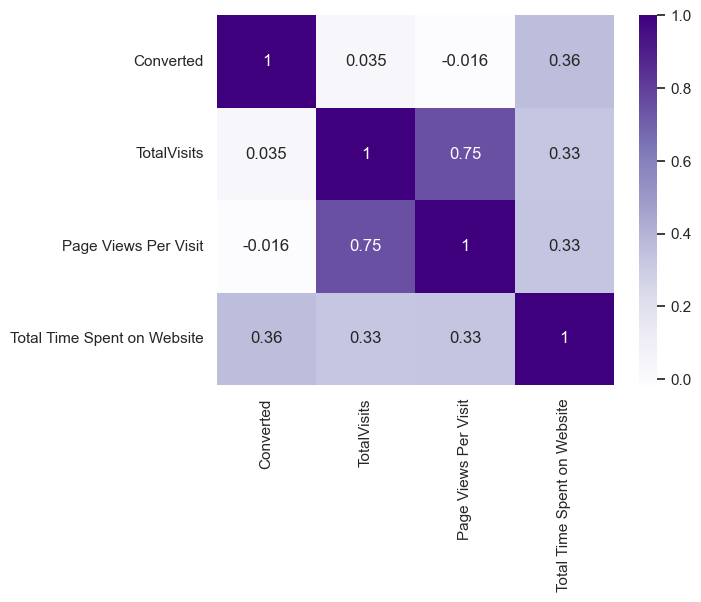

In [77]:
# Heatmap to show correlation between Numerical Variables
sns.heatmap(data = lead[num_var_cols].corr(), cmap = 'Purples', annot = True)
plt.show()

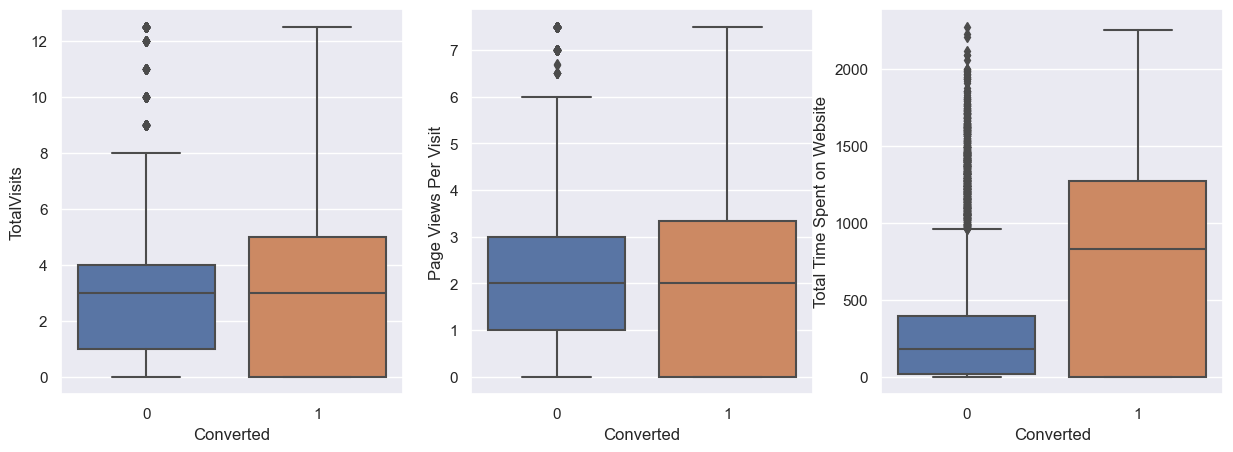

In [78]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead)
plt.show()

#### <strong><span style="color:Magenta"> Inference 16:</strong> 
- There is a strong positive correlation between `'Total Visits'` and `'Page Views per Visit'`, indicating that customers who visit the website more frequently tend to view more pages per visit.

- Customers who spend `more time` on the `website` have a `higher LCR`, indicating that increasing the time spent on the website can lead to `higher conversion rates`.
<hr/>

## <strong><span style="color:cyan"> Step 5: Data Preparation <strong>
<hr/>

### <strong><span style="color:green"> 5.1 Create Dummy Variables </strong>
#### <strong><span style="color:Gold"> Note:</strong>
- For categorical variables with multiple levels, create dummy features (one-hot encoded).

- Since binary level categorical columns are already mapped to 0/1, we can work on the remaining categorical variables, `'Lead Origin'`, `'Lead Source'`, `'Last Activity'`, `'Specialization'`, and `'Current_Occupation'`.
<hr/>

In [79]:
lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_Occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_Copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [80]:
cat_columns2

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Current_Occupation']

In [81]:

# Creating a dummy variable for 5 categorical variables and dropping the first one.
dummy = pd.get_dummies(lead[cat_columns2], drop_first=True)

dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Others  \
0                                      0                     0   
1                                      0                     0   
2                                      0                     0   
3                                      0                     1   
4                                      0                     0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                           

In [82]:
# Adding the results to the master dataframe
lead = pd.concat([lead, dummy], axis=1)
lead.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_Occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_Copy  Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0          0                                    0                          0   
1          0                                    0                          0   
2          1                                    1                          0   
3          0                                    1                          0   
4          0                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
0                   0                       1                           0   
1                   0                       0                           1   
2                   0                       0                           0   
3                   0                       0                           0   
4                   1                       0                           0   

   Lead Source_Others  Lead Source_Reference  Lead Source_Referral Sites  \
0                   0                      0                           0   
1                   0                      0                           0   
2                   0                      0                           0   
3                   0                      0                           0   
4                   0                      0                           0   

   Lead Source_Welingak Website  Last Activity_Email Bounced  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0           

In [83]:
print(f'Shape of Lead df before dropping the original columns: {lead.shape}')

Shape of Lead df before dropping the original columns: (9240, 54)


In [84]:
# Dropping the original columns 'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Current_Occupation'

print(f'Shape of Lead df before dropping the original columns: {lead.shape}')
lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Current_Occupation'], axis=1, inplace=True)
print(f'Shape of Lead df after dropping the original columns: {lead.shape}')

Shape of Lead df before dropping the original columns: (9240, 54)
Shape of Lead df after dropping the original columns: (9240, 49)


In [85]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_Copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

#### <strong><span style="color:Magenta"> Inference 17:</strong> 
- Dummy variables have been created.

- We now have `49 columns` and we have deleted the origina columns `'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'Current_Occupation'`.
<hr/>

## <strong><span style="color:cyan"> Step 6: Train - Test Split of Dataset <strong>
<hr/>

In [86]:
# Assigning all predictor variables to X

X = lead.drop('Converted', axis=1)

# Assigning target variable to y

y = lead['Converted']

print(X.shape)
print(y.shape)

(9240, 48)
(9240,)


In [87]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [88]:
# Splitting the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

print("X_train:", X_train.shape, "\ny_train:", y_train.shape)
print("X_test:", X_test.shape, "\ny_test:", y_test.shape)

X_train: (6468, 48) 
y_train: (6468,)
X_test: (2772, 48) 
y_test: (2772,)


## <strong><span style="color:cyan"> Step 7: Feature Scaling & Correlation Check <strong>
<hr/>

### <strong><span style="color:green"> 7.1 Feature Scaling using StandardScaler <strong>
<hr/>

In [89]:
print(cat_var_cols)
print(num_var_cols)

['Lead Origin', 'Current_Occupation', 'Do Not Email', 'Lead Source', 'Last Activity', 'Specialization', 'Free_Copy']
['Converted', 'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']


In [90]:
# Using standard scaler for scaling the features
scaler = StandardScaler()

# Fetching int64 and float64 dtype columns from dataframe for scaling
num_scaled_cols = X_train.select_dtypes(include=['int64','float64']).columns

num_scaled_cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Free_Copy'],
      dtype='object')

In [91]:
# Scaling the numerical columns spcified in num_scaled_columns_cols

X_train[num_scaled_cols] = scaler.fit_transform(X_train[num_scaled_cols])

# X-train dataframe after standard scaling

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -1.064974                    -0.885371   
6795     -0.291638     0.262370                     0.005716   
3516     -0.291638     0.594206                    -0.691418   
8105     -0.291638     0.594206                     1.365219   
3934     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit  Free_Copy  Lead Origin_Landing Page Submission  \
1871             -1.184892  -0.673169                                    0   
6795             -0.488713   1.485511                                    1   
3516              0.123715  -0.673169                                    0   
8105              1.432322  -0.673169                                    1   
3934             -1.184892  -0.673169                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
1871                           0                     0                   0   
6795                           0                     0                   0   
3516                           0                     0                   0   
8105                           0                     0                   1   
3934                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
1871                       1                           0                   0   
6795                       0                           0                   0   
3516                       1                           0                   0   
8105                       0                           0                   0   
3934                       1                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
1871                      0                           0   
6795                      0                           0   
3516                      0                           0   
8105                      0                           0   
3934                      0                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
1871                             0                            0   
6795                             0                            0   
3516                             0                            0   
8105                             0                            0   
3934                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
1871                                 0                           1   
6795                                 0                           1   
3516                                 0                           1   
8105                                 0                           0   
3934                                 0                           1   

      Last Activity_Form Submitted on Website  \
1871                                        0   
6795                                        0   
3516                                        0   
8105                                        0   
3934                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
1871                                      0                     0   
6795                                      0                     0   
3516                                      0                     0   
8105                                      0                     0   
3934                  

In [92]:
# Checking the Lead Conversion Rate (LCR) for 'Converted' Target Variable

LCR = round((sum(lead['Converted'])/len(lead['Converted']))*100, 2)
print(f'Lead Conversion Rate(LCR) = {LCR}%')

Lead Conversion Rate(LCR) = 38.54%


### <strong><span style="color:green"> 7.2 Checking for Correlations <strong>
<hr/>

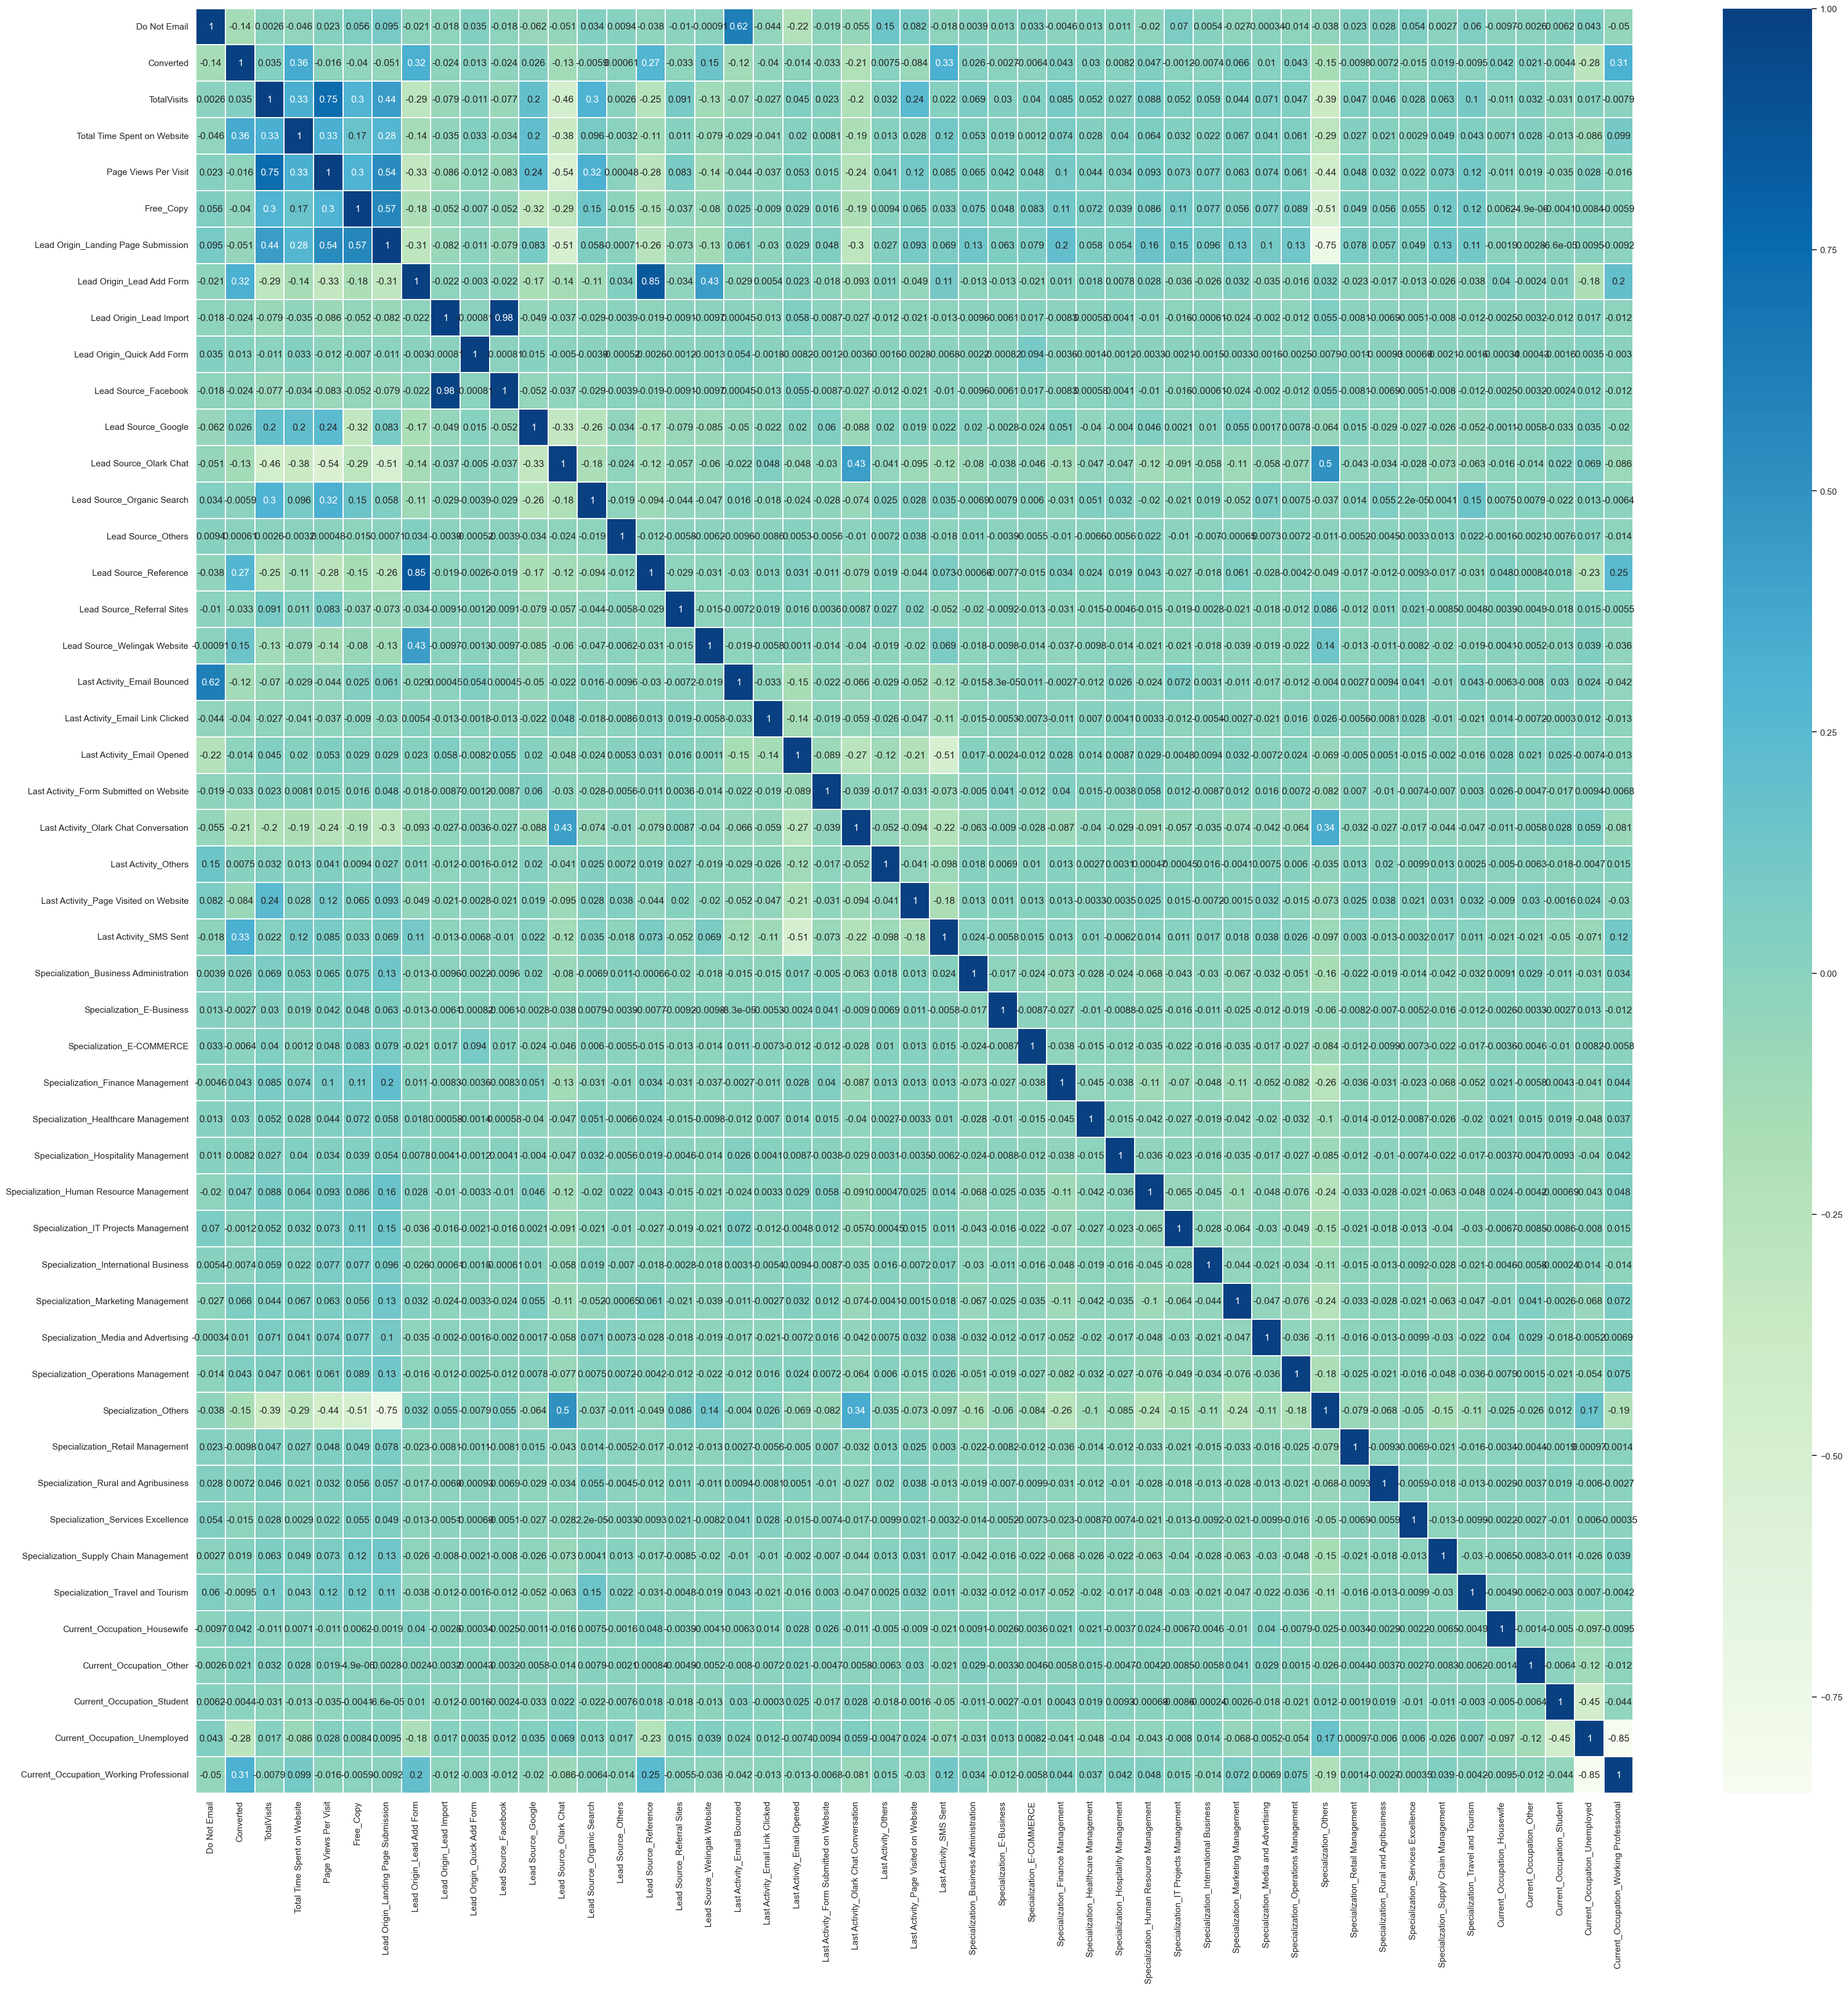

In [93]:
# Analysing correlation matrix

plt.figure(figsize = (40, 40))        
sns.heatmap(lead.corr(), linewidths=0.01, cmap="GnBu", annot=True)
plt.show()

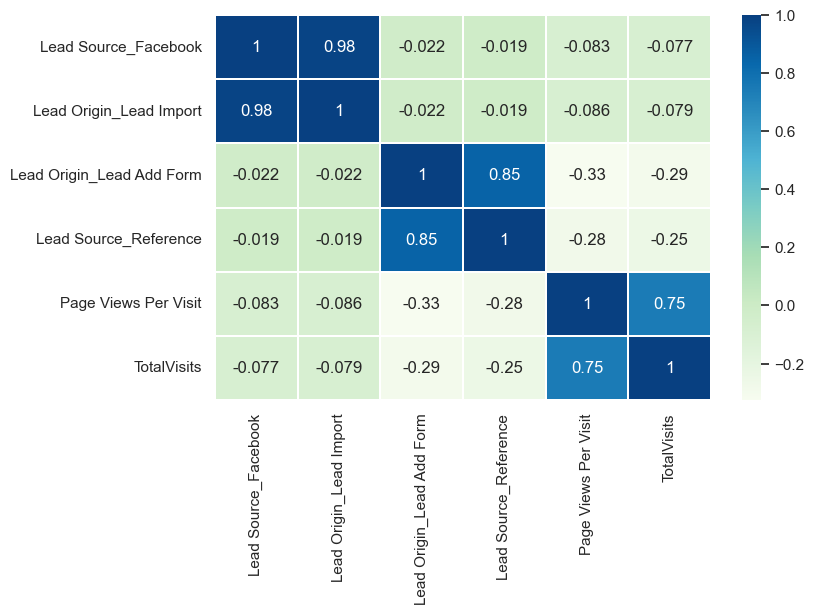

In [94]:
# Breaking down suspected variables which migh have high correlation with each other

plt.figure(figsize = (8,5))        
sns.heatmap(lead[['Lead Source_Facebook','Lead Origin_Lead Import','Lead Origin_Lead Add Form', 'Lead Source_Reference',
                       'Page Views Per Visit', 'TotalVisits']].corr(), linewidths=0.01, cmap="GnBu", annot=True)
plt.show()

#### <strong><span style="color:Magenta"> Inference 18:</strong> 
- The `Lead Conversion Rate(LCR)` is at `38.54%`.

- `'Lead Origin_Lead Import'` and `'Lead Origin_Lead Add Form'` exhibit high correlation with `'Lead Source_Facebook' (0.98)` and `'Lead Source_Reference' (0.85)` respectively, indicating that `dropping` one of them would not significantly impact the overall model performance.
<hr/>

In [95]:
# Dropping columns 'Lead Origin_Lead Import','Lead Origin_Lead Add Form' from X_test & X_train
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

## <strong><span style="color:cyan"> Step 8: Model Building <strong>
<hr/>

#### <strong><span style="color:Gold"> Note:</strong>
- We will build a `Logistic Regression Model` for predicting `categorical` variable.

- Feature Selection Using `RFE (Coarse tuning)`.

- Manual fine-tuning using `p-values` and `VIFs`.
<hr/>

### <strong><span style="color:green"> 8.1 Feature Selection using Recursive Feature Elimination(RFE) <strong>
<hr/>

In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              6468 non-null   float64
 1   TotalVisits                               6468 non-null   float64
 2   Total Time Spent on Website               6468 non-null   float64
 3   Page Views Per Visit                      6468 non-null   float64
 4   Free_Copy                                 6468 non-null   float64
 5   Lead Origin_Landing Page Submission       6468 non-null   uint8  
 6   Lead Origin_Quick Add Form                6468 non-null   uint8  
 7   Lead Source_Facebook                      6468 non-null   uint8  
 8   Lead Source_Google                        6468 non-null   uint8  
 9   Lead Source_Olark Chat                    6468 non-null   uint8  
 10  Lead Source_Organic Search       

In [97]:
logreg = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

# Checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Free_Copy', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 

In [98]:
# instead of using as zip using this for more readablility

# Check the top 15 features chosen by RFE

top15 = pd.DataFrame()
top15['features'] = X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking'] = rfe.ranking_
top15.sort_values(by = 'Ranking')

features  Feature Chosen  Ranking
22                    Last Activity_SMS Sent            True        1
41              Current_Occupation_Housewife            True        1
35                     Specialization_Others            True        1
28     Specialization_Hospitality Management            True        1
20                      Last Activity_Others            True        1
19     Last Activity_Olark Chat Conversation            True        1
17                Last Activity_Email Opened            True        1
14              Lead Source_Welingak Website            True        1
12                     Lead Source_Reference            True        1
11                        Lead Source_Others            True        1
45   Current_Occupation_Working Professional            True        1
9                     Lead Source_Olark Chat            True        1
7                       Lead Source_Facebook            True        1
5        Lead Origin_Landing Page Submission            True        1
2                Total Time Spent on Website            True        1
44             Current_Occupation_Unemployed           False        2
42                  Current_Occupation_Other           False        3
43                Current_Occupation_Student           False        4
37     Specialization_Rural and Agribusiness           False        5
16          Last Activity_Email Link Clicked           False        6
31     Specialization_International Business           False        7
36          Specialization_Retail Management           False        8
1                                TotalVisits           False        9
3                       Page Views Per Visit           False       10
0                               Do Not Email           False       11
21     Last Activity_Page Visited on Website           False       12
23    Specialization_Business Administration           False       13
15               Last Activity_Email Bounced           False       14
34      Specialization_Operations Management           False       15
29  Specialization_Human Resource Management           False       16
32       Specialization_Marketing Management           False       17
4                                  Free_Copy           False       18
6                 Lead Origin_Quick Add Form           False       19
38        Specialization_Services Excellence           False       20
39    Specialization_Supply Chain Management           False       21
8                         Lead Source_Google           False       22
25                 Specialization_E-COMMERCE           False       23
13                Lead Source_Referral Sites           False       24
30     Specialization_IT Projects Management           False       25
27      Specialization_Healthcare Management           False       26
26         Specialization_Finance Management           False       27
10                Lead Source_Organic Search           False       28
18   Last Activity_Form Submitted on Website           False       29
33      Specialization_Media and Advertising           False       30
24                 Specialization_E-Business           False       31
40         Specialization_Travel and Tourism           False       32

### <strong><span style="color:green"> 8.2 Logistic Regression Models <strong>
<hr/>

#### <strong><span style="color:teal"> 8.2.1 Model - 1 <strong>
**Assessing the model with StatsModels, for the detailed statistics**
<hr/>

In [99]:
# columns which are selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_Occupation_Housewife',
       'Current_Occupation_Working Professional'],
      dtype='object')

In [100]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

# Summary of logistic regression model
LRMod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Fri, 02 Jun 2023   Deviance:                       5465.5
Time:                        23:34:35   Pearson chi2:                 8.09e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0333      0.144     -7.155      0.000      -1.316      -0.750
Total Time Spent on Website                 1.0505      0.039     27.169      0.000       0.975       1.126
Lead Origin_Landing Page Submission        -1.2721      0.126    -10.059      0.000      -1.520      -1.024
Lead Source_Facebook                       -0.6961      0.529     -1.316      0.188      -1.733       0.340
Lead Source_Olark Chat                      0.9001      0.119      7.585      0.000       0.668       1.133
Lead Source_Others                          0.9807      0.512      1.915      0.056      -0.023       1.985
Lead Source_Reference                       2.8977      0.216     13.434      0.000       2.475       3.320
Lead Source_Welingak Website                5.3802      0.729      7.384      0.000       3.952       6.808
Last Activity_Email Opened                  0.9506      0.105      9.061      0.000       0.745       1.156
Last Activity_Olark Chat Conversation      -0.5534      0.187     -2.956      0.003      -0.920      -0.186
Last Activity_Others                        1.2580      0.238      5.276      0.000       0.791       1.725
Last Activity_SMS Sent                      2.0688      0.108     19.188      0.000       1.857       2.280
Specialization_Hospitality Management      -1.0720      0.324     -3.310      0.001      -1.707      -0.437
Specialization_Others                      -1.1937      0.121     -9.841      0.000      -1.431      -0.956
Current_Occupation_Housewife               23.0222   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Current_Occupation_Working Professional     2.6855      0.190     14.104      0.000       2.312       3.059
===========================================================================================================
"""

#### <strong><span style="color:Magenta"> Inference 19:</strong> 
- The p-value of `Current_Occupation_Housewife` is `0.999` which is higher than the threshold of 0.05 and it should be dropped.
<hr/>

In [101]:
# Dropping 'Current_Occupation_Housewife' column

rfe_col = rfe_col.drop('Current_Occupation_Housewife')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_Occupation_Working Professional'],
      dtype='object')

#### <strong><span style="color:teal"> 8.2.2 Model - 2 <strong>
<hr/>

In [102]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod2 = sm.GLM(y_train, X_train_sm2, family = sm.families.Binomial()).fit()

# parameters of logistic regression model
print(LRMod2.params)

# Summary of logistic regression model
LRMod2.summary()

const                                     -1.025075
Total Time Spent on Website                1.049364
Lead Origin_Landing Page Submission       -1.267369
Lead Source_Facebook                      -0.696913
Lead Source_Olark Chat                     0.899051
Lead Source_Others                         0.973897
Lead Source_Reference                      2.917123
Lead Source_Welingak Website               5.379144
Last Activity_Email Opened                 0.949036
Last Activity_Olark Chat Conversation     -0.558345
Last Activity_Others                       1.248172
Last Activity_SMS Sent                     2.058828
Specialization_Hospitality Management     -1.079528
Specialization_Others                     -1.197801
Current_Occupation_Working Professional    2.677350
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Fri, 02 Jun 2023   Deviance:                       5480.7
Time:                        23:34:35   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3825
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0251      0.144     -7.111      0.000      -1.308      -0.743
Total Time Spent on Website                 1.0494      0.039     27.177      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2674      0.126    -10.030      0.000      -1.515      -1.020
Lead Source_Facebook                       -0.6969      0.529     -1.318      0.187      -1.733       0.339
Lead Source_Olark Chat                      0.8991      0.119      7.580      0.000       0.667       1.132
Lead Source_Others                          0.9739      0.512      1.902      0.057      -0.030       1.977
Lead Source_Reference                       2.9171      0.215     13.538      0.000       2.495       3.339
Lead Source_Welingak Website                5.3791      0.729      7.384      0.000       3.951       6.807
Last Activity_Email Opened                  0.9490      0.105      9.077      0.000       0.744       1.154
Last Activity_Olark Chat Conversation      -0.5583      0.187     -2.985      0.003      -0.925      -0.192
Last Activity_Others                        1.2482      0.238      5.238      0.000       0.781       1.715
Last Activity_SMS Sent                      2.0588      0.108     19.151      0.000       1.848       2.270
Specialization_Hospitality Management      -1.0795      0.324     -3.334      0.001      -1.714      -0.445
Specialization_Others                      -1.1978      0.121     -9.881      0.000      -1.435      -0.960
Current_Occupation_Working Professional     2.6773      0.190     14.068      0.000       2.304       3.050
===========================================================================================================
"""

#### <strong><span style="color:Magenta"> Inference 20:</strong> 
- The p-value of `Lead Source_Facebook` is `0.187` which is higher than the threshold of 0.05 and it should be dropped.
<hr/>

In [103]:
# Dropping 'Lead Source_Facebook' column

rfe_col = rfe_col.drop('Lead Source_Facebook')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_Occupation_Working Professional'],
      dtype='object')

#### <strong><span style="color:teal"> 8.2.3 Model - 3 <strong>
<hr/>

In [104]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod3 = sm.GLM(y_train, X_train_sm3, family = sm.families.Binomial()).fit()

# parameters of logistic regression model
print(LRMod3.params)

# Summary of logistic regression model
LRMod3.summary()

const                                     -1.040542
Total Time Spent on Website                1.051824
Lead Origin_Landing Page Submission       -1.249311
Lead Source_Olark Chat                     0.916940
Lead Source_Others                         0.981395
Lead Source_Reference                      2.937179
Lead Source_Welingak Website               5.396676
Last Activity_Email Opened                 0.943420
Last Activity_Olark Chat Conversation     -0.558250
Last Activity_Others                       1.248700
Last Activity_SMS Sent                     2.055550
Specialization_Hospitality Management     -1.090368
Specialization_Others                     -1.194330
Current_Occupation_Working Professional    2.675678
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Fri, 02 Jun 2023   Deviance:                       5482.6
Time:                        23:34:36   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0405      0.144     -7.245      0.000      -1.322      -0.759
Total Time Spent on Website                 1.0518      0.039     27.262      0.000       0.976       1.127
Lead Origin_Landing Page Submission        -1.2493      0.125     -9.958      0.000      -1.495      -1.003
Lead Source_Olark Chat                      0.9169      0.118      7.773      0.000       0.686       1.148
Lead Source_Others                          0.9814      0.512      1.917      0.055      -0.022       1.985
Lead Source_Reference                       2.9372      0.215     13.661      0.000       2.516       3.359
Lead Source_Welingak Website                5.3967      0.728      7.409      0.000       3.969       6.824
Last Activity_Email Opened                  0.9434      0.105      9.028      0.000       0.739       1.148
Last Activity_Olark Chat Conversation      -0.5582      0.187     -2.984      0.003      -0.925      -0.192
Last Activity_Others                        1.2487      0.238      5.239      0.000       0.782       1.716
Last Activity_SMS Sent                      2.0555      0.107     19.124      0.000       1.845       2.266
Specialization_Hospitality Management      -1.0904      0.323     -3.377      0.001      -1.723      -0.458
Specialization_Others                      -1.1943      0.121     -9.873      0.000      -1.431      -0.957
Current_Occupation_Working Professional     2.6757      0.190     14.063      0.000       2.303       3.049
===========================================================================================================
"""

#### <strong><span style="color:Magenta"> Inference 21:</strong> 
- The p-value of `Lead Source_Others` is `0.055` which is higher than the threshold of 0.05 and it should be dropped.
<hr/>

In [105]:
# Dropping 'Lead Source_Others' column

rfe_col = rfe_col.drop('Lead Source_Others')
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Current_Occupation_Working Professional'],
      dtype='object')

#### <strong><span style="color:teal"> 8.2.4 Model - 4 <strong>
<hr/>

In [106]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
LRMod4 = sm.GLM(y_train, X_train_sm4, family = sm.families.Binomial()).fit()

# parameters of logistic regression model
print(LRMod4.params)

# Summary of logistic regression model
LRMod4.summary()

const                                     -1.023594
Total Time Spent on Website                1.049789
Lead Origin_Landing Page Submission       -1.258954
Lead Source_Olark Chat                     0.907184
Lead Source_Reference                      2.925326
Lead Source_Welingak Website               5.388662
Last Activity_Email Opened                 0.942099
Last Activity_Olark Chat Conversation     -0.555605
Last Activity_Others                       1.253061
Last Activity_SMS Sent                     2.051879
Specialization_Hospitality Management     -1.094445
Specialization_Others                     -1.203333
Current_Occupation_Working Professional    2.669665
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Fri, 02 Jun 2023   Deviance:                       5486.1
Time:                        23:34:36   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3819
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.0236      0.143     -7.145      0.000      -1.304      -0.743
Total Time Spent on Website                 1.0498      0.039     27.234      0.000       0.974       1.125
Lead Origin_Landing Page Submission        -1.2590      0.125    -10.037      0.000      -1.505      -1.013
Lead Source_Olark Chat                      0.9072      0.118      7.701      0.000       0.676       1.138
Lead Source_Reference                       2.9253      0.215     13.615      0.000       2.504       3.346
Lead Source_Welingak Website                5.3887      0.728      7.399      0.000       3.961       6.816
Last Activity_Email Opened                  0.9421      0.104      9.022      0.000       0.737       1.147
Last Activity_Olark Chat Conversation      -0.5556      0.187     -2.974      0.003      -0.922      -0.189
Last Activity_Others                        1.2531      0.238      5.259      0.000       0.786       1.720
Last Activity_SMS Sent                      2.0519      0.107     19.106      0.000       1.841       2.262
Specialization_Hospitality Management      -1.0944      0.323     -3.391      0.001      -1.727      -0.462
Specialization_Others                      -1.2033      0.121     -9.950      0.000      -1.440      -0.966
Current_Occupation_Working Professional     2.6697      0.190     14.034      0.000       2.297       3.042
===========================================================================================================
"""

#### <strong><span style="color:Magenta"> Inference 22:</strong> 
- The Logistic Regression Model - 4 (`LRMod4`) is `stable` and all the p-values are within the acceptable threshold (`p-values < 0.05`), thus making it suitable for further analysis.

- Now lets check the `Variance Inflation Factor` (`VIF`) for these variables to check if there is any `multicollinearity` which exists among the independent variables.
<hr/>

In [107]:
# UDF for calculating VIFs for variables

def VIF_val(Xtrain_df):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature in a given pandas DataFrame.

    Parameters:
        Xtrain_df (pandas.DataFrame): The DataFrame containing the features for which to calculate VIF.

    Returns:
        pd.DataFrame: A DataFrame containing the calculated VIF values for each feature in Xtrain_df.
    """
    # Create an empty DataFrame to store the results
    vif_df = pd.DataFrame()

    # Add column names to the DataFrame
    vif_df['Features'] = Xtrain_df.columns

    # Calculate the VIF for each feature and add it to the DataFrame
    vif_df['VIF'] = [variance_inflation_factor(Xtrain_df.values, i) for i in range(Xtrain_df.shape[1])]

    # Round the VIF values to two decimal places
    vif_df['VIF'] = round(vif_df['VIF'], 2)

    # Sort the DataFrame by VIF values in descending order
    vif_df = vif_df.sort_values(by='VIF', ascending=False)

    # Reset the index of the DataFrame
    vif_df = vif_df.reset_index(drop=True)

    # Return the DataFrame with calculated VIF values
    return vif_df


In [108]:

# Now checking VIFs for all variables in the Logistic Regression Model - 4
VIF_val(X_train_rfe)

Features   VIF
0                     Specialization_Others  2.47
1       Lead Origin_Landing Page Submission  2.45
2                Last Activity_Email Opened  2.36
3                    Last Activity_SMS Sent  2.20
4                    Lead Source_Olark Chat  2.14
5     Last Activity_Olark Chat Conversation  1.72
6                     Lead Source_Reference  1.31
7               Total Time Spent on Website  1.24
8   Current_Occupation_Working Professional  1.21
9              Lead Source_Welingak Website  1.08
10                     Last Activity_Others  1.08
11    Specialization_Hospitality Management  1.02

#### <strong><span style="color:Magenta"> Inference 23:</strong> 
- All variables in our logistic regression model have `VIF values less than 5`, indicating `no high multicollinearity` issues.

- All variables in our logistic regression model have `p-values less than 0.05`, suggesting that they are s`tatistically significant predictors` of the outcome variable.

- Based on these findings, we have selected <strong>`Logistic Regression Model - 4 (LRMod4)`</strong> as our final model for making predictions. We will not consider any other models for further analysis, as this model has acceptable values for both VIF and p-values.
<hr/>

## <strong><span style="color:cyan"> Step 9: Model Evaluation <strong>
<hr/>

#### <strong><span style="color:Gold"> We will check: </span></strong> 
- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

### <strong><span style="color:green"> 9.1 Predicting on the Train set <strong>
<hr/>

In [109]:
# Getting the predicted values on the train set

y_train_pred = LRMod4.predict(X_train_sm4).values.reshape(-1)
y_train_pred[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [110]:
y_train[:10]

1871    0
6795    0
3516    0
8105    0
3934    0
4844    1
3297    0
8071    1
987     0
7423    1
Name: Converted, dtype: int64

In [111]:
# Creating a data frame with the actual Converted score and Probability of conversion

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.474082         1871
1          0        0.073252         6795
2          0        0.249087         3516
3          0        0.768973         8105
4          0        0.212973         3934

#### <strong><span style="color:Magenta"> Inference 24:</strong> 
- We have to find the `optimal cutoff threshold value of Probability`. 
<hr/>

#### <strong><span style="color:Gold"> Note: </span></strong>
- We start with default `0.5 value` and add a new feature named `predicted` in the above dataframe using the `probabilities`.

In [112]:
# Mapping the Prediction Conversion Rate (PCR) according to the probability cut off.

y_train_pred_final['Predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted
0          0        0.474082         1871          0
1          0        0.073252         6795          0
2          0        0.249087         3516          0
3          0        0.768973         8105          1
4          0        0.212973         3934          0

### <strong><span style="color:green"> 9.2 Confusion Matrix <strong>
<hr/>

In [113]:
# Define a function to calculate the metrics of a confusion matrix
def confusion_matrix_metrics(confusion_matrix):
    # Extract the values from the confusion matrix
    tp = confusion_matrix[1,1] # true positive
    tn = confusion_matrix[0,0] # true negatives
    fp = confusion_matrix[0,1] # false positives
    fn = confusion_matrix[1,0] # false negatives

    # Calculate the accuracy, sensitivity, specificity, false positive rate, precision,
    # recall, and negative predictive value
    accuracy = round((tn + tp) / (tn + tp + fn + fp), 4)
    sensitivity = round(tp / (tp + fn), 4)
    specificity = round(tn / (tn + fp), 4)
    false_positive_rate = round(fp / (tn + fp), 4)
    precision = round(tp / (tp + fp), 4)
    recall = round(tp / (tp + fn), 4)
    negative_predictive_value = round(tn / (tn + fn) , 4)

    # Create a dictionary to store the metrics
    metrics = {
        'accuracy': accuracy,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'false_positive_rate': false_positive_rate,
        'precision': precision,
        'recall': recall,
        'negative_predictive_value': negative_predictive_value
    }

    # Return the metrics dictionary
    return metrics

In [114]:
# Confusion matrix  (Actual / Predicted)

confusion1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion1)

[[3588  414]
 [ 846 1620]]


In [115]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3588       |   414
# converted           846        |   1620  


# Above is the confusion matrix when we use threshold of probability as 0.5

In [116]:
confusion_matrix_metrics(confusion1)

{'accuracy': 0.8052,
 'sensitivity': 0.6569,
 'specificity': 0.8966,
 'false_positive_rate': 0.1034,
 'precision': 0.7965,
 'recall': 0.6569,
 'negative_predictive_value': 0.8092}

#### <strong><span style="color:Magenta"> Inference 25:</strong> 
We have the results of the confusion matrix as:
- Accuracy: `0.62`
- Sensitivity: `0.69`
- Specificity: `0.33`
- False_positive_rate: `0.67`
- Precision: `0.81`
- Recall: `0.69`
- Negative_predictive_value: `0.2`

### <strong><span style="color:green"> 9.3 Plotting the ROC Curve <strong>
<hr/>

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [117]:
# UDF to draw ROC curve 

def draw_roc(actual, predicted_probabilities):
    """
    Draws a receiver operating characteristic (ROC) curve using the actual and predicted probabilities.

    Args:
        actual (list): A list of binary values representing the actual class labels.
        predicted_probabilities (list): A list of probabilities between 0 and 1 representing the predicted class probabilities.

    Returns:
        None
    """
    # Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
    fpr, tpr, thresholds = metrics.roc_curve(actual, predicted_probabilities, drop_intermediate=False)

    # Calculate the area under the ROC curve (AUC) score
    auc_score = metrics.roc_auc_score(actual, predicted_probabilities)

    # Plot the ROC curve
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

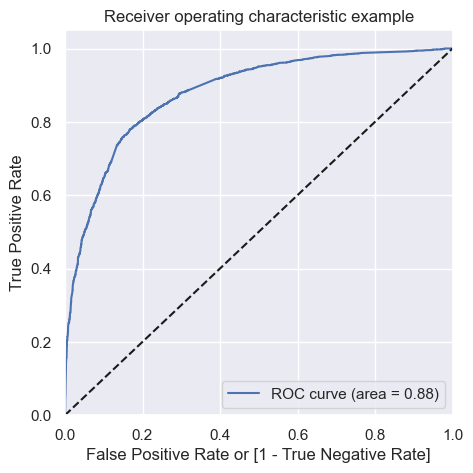

In [118]:
# Drawing ROC curve for Train Set

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'],
                                         drop_intermediate = False )
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

#### <strong><span style="color:Magenta"> Inference 26:</strong> 
- Area under ROC curve is 0.88 out of 1 which indicates a good predictive model. 
<hr/>

#### <strong><span style="color:teal"> 9.3.1 Finding Optimal Cutoff Point/ Probability </strong>
- It is that probability where we get `balanced sensitivity` and `specificity`.
<hr/>

In [119]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.474082         1871          0    1    1    1    1    1   
1          0        0.073252         6795          0    1    0    0    0    0   
2          0        0.249087         3516          0    1    1    1    0    0   
3          0        0.768973         8105          1    1    1    1    1    1   
4          0        0.212973         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [120]:
# Initialize an empty dataframe to store the metrics
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

# Loop through different probability cutoffs
for i in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:

    # Calculate confusion matrix for the current cutoff
    cm = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])

    # Calculate total number of observations
    total = sum(sum(cm))

    # Calculate accuracy, sensitivity, and specificity for the current cutoff
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    # Store the metrics in the dataframe
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]

cutoff_df

prob  accuracy  sensitivity  specificity
0.0   0.0  0.381262     1.000000     0.000000
0.1   0.1  0.595702     0.973642     0.362819
0.2   0.2  0.721243     0.920114     0.598701
0.3   0.3  0.791280     0.832928     0.765617
0.4   0.4  0.813698     0.763585     0.844578
0.5   0.5  0.805195     0.656934     0.896552
0.6   0.6  0.792981     0.585969     0.920540
0.7   0.7  0.779066     0.507705     0.946277
0.8   0.8  0.754020     0.405515     0.968766
0.9   0.9  0.707792     0.247364     0.991504

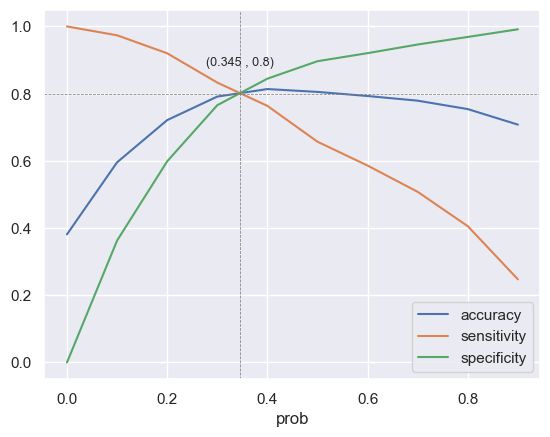

In [121]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Finding the intersection points of the sensitivity and accuracy curves

sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensitivity'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves

speci_interp = interp1d(cutoff_df['prob'], cutoff_df['specificity'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points

intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point

accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point

cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 

plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot

plt.show()

#### <strong><span style="color:Magenta"> Inference 27:</strong> 
- Based on the curve analysis, a `cutoff probability` of `≈0.35` is suggested as the `optimal point for classification`. 
<hr/>

#### <strong><span style="color:Gold"> Note:</strong>
- We will map again using `optimal cutoff point`.

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe

y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.474082         1871                1
1          0        0.073252         6795                0
2          0        0.249087         3516                0
3          0        0.768973         8105                1
4          0        0.212973         3934                0

### <strong><span style="color:green"> 9.4 Calculating all metrics using confusion matrix for Train <strong>
<hr/>

In [123]:
# Checking the overall accuracy.

confusion2 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print(confusion2)

[[3230  772]
 [ 492 1974]]


In [124]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3230       |   772
# converted           492        |   1974  


# Above is the confusion matrix when we use threshold of probability as 0.35

In [125]:
confusion_matrix_metrics(confusion2)

{'accuracy': 0.8046,
 'sensitivity': 0.8005,
 'specificity': 0.8071,
 'false_positive_rate': 0.1929,
 'precision': 0.7189,
 'recall': 0.8005,
 'negative_predictive_value': 0.8678}

#### <strong><span style="color:Magenta"> Inference 28:</strong> 
We have the results of the confusion matrix as:
- For `Train Set`:
    - Accuracy: `0.8046`
    - Sensitivity: `0.8005`
    - Specificity: `0.8071`
    - False_positive_rate: `0.1929`
    - Precision: `0.7189`
    - Recall: `0.8005`
    - Negative_predictive_value: `0.8678`
<hr/>

### <strong><span style="color:green"> 9.5 Precision & Recall Tradeoff <strong>
<hr/>

#### <strong><span style="color:Gold"> We will compare: </span></strong> 
- All metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for `boosting conversion rate to 80%` as asked by CEO.

In [126]:
# Creating precision-recall tradeoff curve

y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

In [127]:
p_score = round(precision_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)
r_score = round(recall_score(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']), 4)

print('Precision score =', p_score)
print('Recall score    =', r_score)

Precision score = 0.7189
Recall score    = 0.8005


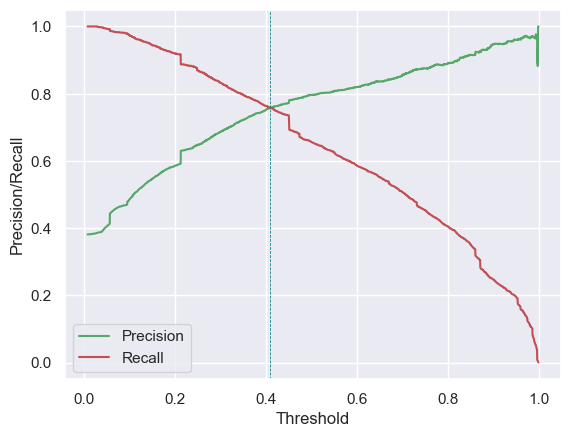

In [128]:
# plot precision-recall tradeoff curve

plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

#### <strong><span style="color:Magenta"> Inference 29:</strong> 
Based on the `precision-recall curve`, a threshold of `0.41` provides a good balance between precision and recall.
<hr/>

In [129]:
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted
0          0        0.474082         1871                1
1          0        0.073252         6795                0
2          0        0.249087         3516                0
3          0        0.768973         8105                1
4          0        0.212973         3934                0

In [130]:
# copying df to test model evaluation with precision recall threshold of 0.41

y_train_precision_recall = y_train_pred_final.copy()

In [131]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)

y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  final_predicted  \
0          0        0.474082         1871                1   
1          0        0.073252         6795                0   
2          0        0.249087         3516                0   
3          0        0.768973         8105                1   
4          0        0.212973         3934                0   

   precision_recall_prediction  
0                            1  
1                            0  
2                            0  
3                            1  
4                            0

In [132]:
## Lets see all matrics at 0.41 cutoff in precision-recall view and compare it with 0.345 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df

confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])

print('Confusion Matrix')
print(confusion_matrix)

Confusion Matrix
[[3406  596]
 [ 596 1870]]


In [133]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3406       |   596
# converted           596        |   1870  


# Above is the confusion matrix when we use threshold of probability as 0.41

In [134]:
# Using UDF to calculate all metrices of logistic regression

confusion_matrix_metrics(confusion_matrix)


{'accuracy': 0.8157,
 'sensitivity': 0.7583,
 'specificity': 0.8511,
 'false_positive_rate': 0.1489,
 'precision': 0.7583,
 'recall': 0.7583,
 'negative_predictive_value': 0.8511}

#### <strong><span style="color:Magenta"> Inference 30:</strong> 
- As we can see in above metrics when we used precision-recall threshold cut-off of 0.41 the values in Precision, Sensitivity, Recall have dropped to around 75%, but we need it close to 80% as the Business Objective.

- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.345. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.
<hr/>

#### <strong><span style="color:Gold"> Adding Lead Score Feature to Training dataframe </span></strong> 
- A higher score would mean that the lead is hot, i.e. is most likely to convert.

In [135]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.474082         1871                1          47
1          0        0.073252         6795                0           7
2          0        0.249087         3516                0          25
3          0        0.768973         8105                1          77
4          0        0.212973         3934                0          21

## <strong><span style="color:cyan"> Step 10: Making Predictions on Test Set <strong>
<hr/>

### <strong><span style="color:green"> 10.1 Scaling Test dataset <strong>
<hr/>

In [136]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   Free_Copy                                 2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [137]:
# fetching int64 and float64 dtype columns from dataframe for scaling

num_test_cols = X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns

X_test[num_test_cols] = scaler.transform(X_test[num_test_cols])

X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
4269     -0.291638     1.589714                     0.964504   
2376     -0.291638    -1.064974                    -0.885371   
7766     -0.291638     0.594206                    -0.777416   
9199     -0.291638    -1.064974                    -0.885371   
4359     -0.291638    -1.064974                    -0.885371   

      Page Views Per Visit  Free_Copy  Lead Origin_Landing Page Submission  \
4269              2.740929  -0.673169                                    0   
2376             -1.184892  -0.673169                                    0   
7766              1.432322  -0.673169                                    0   
9199             -1.184892  -0.673169                                    0   
4359             -1.184892  -0.673169                                    0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  Lead Source_Google  \
4269                           0                     0                   0   
2376                           0                     0                   0   
7766                           0                     0                   1   
9199                           0                     0                   0   
4359                           0                     0                   0   

      Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Others  \
4269                       0                           0                   0   
2376                       0                           0                   0   
7766                       0                           0                   0   
9199                       1                           0                   0   
4359                       0                           0                   0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4269                      0                           0   
2376                      1                           0   
7766                      0                           0   
9199                      0                           0   
4359                      1                           0   

      Lead Source_Welingak Website  Last Activity_Email Bounced  \
4269                             0                            0   
2376                             0                            0   
7766                             0                            0   
9199                             0                            0   
4359                             0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
4269                                 0                           0   
2376                                 0                           0   
7766                                 0                           0   
9199                                 0                           0   
4359                                 0                           1   

      Last Activity_Form Submitted on Website  \
4269                                        0   
2376                                        0   
7766                                        0   
9199                                        0   
4359                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     1   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
4269                                      0                       1   
2376                                      0                       1   
7766                                      0                       0   
9199                         

In [138]:
X_test = X_test[rfe_col]

X_test.head()

Total Time Spent on Website  Lead Origin_Landing Page Submission  \
4269                     0.964504                                    0   
2376                    -0.885371                                    0   
7766                    -0.777416                                    0   
9199                    -0.885371                                    0   
4359                    -0.885371                                    0   

      Lead Source_Olark Chat  Lead Source_Reference  \
4269                       0                      0   
2376                       0                      1   
7766                       0                      0   
9199                       1                      0   
4359                       0                      1   

      Lead Source_Welingak Website  Last Activity_Email Opened  \
4269                             0                           0   
2376                             0                           0   
7766                             0                           0   
9199                             0                           0   
4359                             0                           1   

      Last Activity_Olark Chat Conversation  Last Activity_Others  \
4269                                      0                     0   
2376                                      0                     0   
7766                                      0                     1   
9199                                      1                     0   
4359                                      0                     0   

      Last Activity_SMS Sent  Specialization_Hospitality Management  \
4269                       1                                      0   
2376                       1                                      0   
7766                       0                                      0   
9199                       0                                      0   
4359                       0                                      0   

      Specialization_Others  Current_Occupation_Working Professional  
4269                      1                                        0  
2376                      1                                        0  
7766                      0                                        1  
9199                      1                                        0  
4359                      0                                        0

### <strong><span style="color:green"> 10.2 Prediction on Test Dataset using final model <strong>
<hr/>

In [139]:
# Adding contant value

X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [140]:
# making prediction using model 4 (final model)

y_test_pred = LRMod4.predict(X_test_sm)

In [141]:
# top 10 rows

y_test_pred[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [142]:
# Converting y_test_pred to dataframe of predicted probability

y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

0
4269  0.697934
2376  0.860665
7766  0.889241
9199  0.057065
4359  0.871510

In [143]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [144]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

y_test_df.head()

Converted  Prospect ID
4269          1         4269
2376          1         2376
7766          1         7766
9199          0         9199
4359          1         4359

In [145]:
# Removing index for both dataframes to append them side by side 

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred

y_test_pred_final = pd.concat([y_test_df, y_test_pred], axis = 1)
y_test_pred_final.head()

Converted  Prospect ID         0
0          1         4269  0.697934
1          1         2376  0.860665
2          1         7766  0.889241
3          0         9199  0.057065
4          1         4359  0.871510

In [146]:
# Renaming the column 

y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns

y_test_pred_final = y_test_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_test_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.697934
1         2376          1        0.860665
2         7766          1        0.889241
3         9199          0        0.057065
4         4359          1        0.871510

In [147]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training

y_test_pred_final['final_predicted'] = y_test_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_test_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.697934                1
1         2376          1        0.860665                1
2         7766          1        0.889241                1
3         9199          0        0.057065                0
4         4359          1        0.871510                1

### <strong><span style="color:green"> 10.3 Plotting ROC Curve for Test Set <strong>
<hr/>

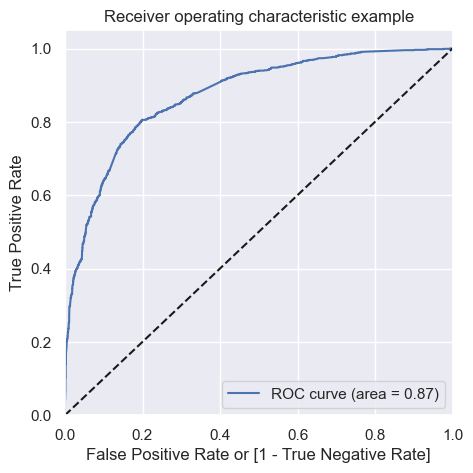

In [148]:
# Drawing ROC curve for Test Set

fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final["Converted"], y_test_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_test_pred_final["Converted"], y_test_pred_final["Converted_Prob"])

#### <strong><span style="color:Magenta"> Inference 31:</strong> 
- `Area under ROC curve` is `0.87` out of 1 which indicates a good predictive model.

- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set. 

- We will do this by comparing the `predicted labels (final_predicted)` to the `actual labels (Converted)` to compute various performance metrics such as `accuracy, precision, recall`, etc.
<hr/>

### <strong><span style="color:green"> 10.4 Model Evaluation on Test Set <strong>
<hr/>

#### <strong><span style="color:Gold"> Note:</strong>
- Calculating all metrics using confusion matrix for Test set

In [149]:
confusion_m_test = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['final_predicted'])
print(confusion_m_test)

[[1353  324]
 [ 221  874]]


In [150]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       1353       |   324
# converted           221        |   874  


# Above is the confusion matrix when we use threshold of probability as 0.345

In [151]:
confusion_matrix_metrics(confusion_m_test)

{'accuracy': 0.8034,
 'sensitivity': 0.7982,
 'specificity': 0.8068,
 'false_positive_rate': 0.1932,
 'precision': 0.7295,
 'recall': 0.7982,
 'negative_predictive_value': 0.8596}

#### <strong><span style="color:Magenta"> Inference 32:</strong> 
The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
- `For Test set`
    - Accuracy : `80.34%`
    - Sensitivity : 79.82% ≈ `80%`
    - Specificity : `80.68%`
    - false_positive_rate : `19.32%`
    - precision : `72.95%`
    - recall : `79.82%`
    - negative_predictive_value : `85.96%`
    
These matrics are very close to train set, so out final model logm4 is  performing with good consistency on both Train & Test set.
<hr/>

In [152]:
# features and their coefficicent from final model

parameters = LRMod4.params.sort_values(ascending = False)
pd.DataFrame(parameters)

0
Lead Source_Welingak Website             5.388662
Lead Source_Reference                    2.925326
Current_Occupation_Working Professional  2.669665
Last Activity_SMS Sent                   2.051879
Last Activity_Others                     1.253061
Total Time Spent on Website              1.049789
Last Activity_Email Opened               0.942099
Lead Source_Olark Chat                   0.907184
Last Activity_Olark Chat Conversation   -0.555605
const                                   -1.023594
Specialization_Hospitality Management   -1.094445
Specialization_Others                   -1.203333
Lead Origin_Landing Page Submission     -1.258954

#### <strong><span style="color:Magenta"> Inference 33:</strong> 
- A `high positive coefficient` indicates that a variable has a `stronger influence` on `predicting the probability of leads converting` to take up X-Education's course. 
<hr/>

## <strong><span style="color:cyan"> Step 11: Adding Lead Score column to Test dataframe <strong>
<hr/>

In [153]:
y_test_pred_final['Lead_Score'] = y_test_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_test_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
0         4269          1        0.697934                1          70
1         2376          1        0.860665                1          86
2         7766          1        0.889241                1          89
3         9199          0        0.057065                0           6
4         4359          1        0.871510                1          87

In [154]:
y_test_pred_final.sort_values(by='Lead_Score', ascending=False).head()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
1026         5671          1        0.998942                1         100
1239         2489          1        0.996164                1         100
1976         4775          1        0.996645                1         100
196          5793          1        0.996645                1         100
416          2804          1        0.996645                1         100

In [155]:
y_test_pred_final.sort_values(by='Lead_Score', ascending=False).tail()

Prospect ID  Converted  Converted_Prob  final_predicted  Lead_Score
104           155          0        0.013285                0           1
2712         2577          0        0.014743                0           1
1136         4098          0        0.014996                0           1
597          3682          0        0.013772                0           1
1029         5993          0        0.014088                0           1

#### <strong><span style="color:Magenta"> Inference 34:</strong> 
- `Lead Score` is assigned to the customers.

- The customers with a `higher lead score` have a `higher conversion chance`. 

- The customers with a `lower lead score` have a `lower conversion chance`.
<hr/>

## <strong><span style="color:cyan"> Conclusion: Train - Test </strong>
<hr/>

### <strong><span style="color:green">Train Data Set:</span></strong>            

- <strong><span style="color:teal">Accuracy:</span></strong> 80.46%

- <strong><span style="color:teal">Sensitivity:</span></strong> 80.05%

- <strong><span style="color:teal">Specificity:</span></strong> 80.71%

### <strong><span style="color:green">Test Data Set:</span></strong> 

- <strong><span style="color:teal">Accuracy:</span></strong> 80.34%

- <strong><span style="color:teal">Sensitivity:</span></strong> 79.82% ≈ 80%

- <strong><span style="color:teal">Specificity:</span></strong> 80.68%
 

### <strong><span style="color:Magenta"> Inference 35:</strong>  
- The evaluation metrics of the model are consistently close to each other, indicating that the model is performing consistently across different evaluation metrics in both the test and train datasets. 

- The model achieved a `sensitivity of 80.05%` in the train set and `79.82%` in the test set, using a cut-off value of `0.345`.

- Sensitivity in this case indicates how many leads the model identified correctly out of all potential leads which are converting.

- `The CEO of X Education had set a target sensitivity of around 80%`. The model also achieved an `accuracy of 80.46%`, which is in line with the study's objectives.

- This consistency suggests that the model is reliable and is not overfitting to the training data. It also implies that the model is generalizing well to new data, which is important for real-world applications. 

- The similar performance across evaluation metrics also means that there are no significant biases in the model's predictions. This is a positive sign for the model's performance and provides confidence in its ability to make accurate predictions in the future..
<hr/>

### <strong><span style="color:green">Equation: </span></strong>
ln(odds) = - 1.0236 x const + 1.0498 x Total Time Spent on Website - 1.259 x Lead Origin_Landing Page Submission + 0.9072 x Lead Source_Olark Chat + 2.9253 x Lead Source_Reference + 5.3887 x Lead Source_Welingak Website + 0.9421 x Last Activity_Email Opened -0.5556 x Last Activity_Olark Chat Conversation + 1.2531 x Last Activity_Others + 2.0519 x Last Activity_SMS Sent - 1.0944 x Specialization_Hospitality Management - 1.2033 x Specialization_Others + 2.6697 x Current_Occupation_Working Professional
<hr/>

### <strong><span style="color:green">  Model parameters <strong>
- The final Logistic Regression Model has `12 features`.

#### <strong><span style="color:teal"> `Top 3 features` that contributing `positively` to predicting hot leads in the model are:</span></strong> 
- <strong><span style="color:Gold">Lead Source_Welingak Website</span></strong>

- <strong><span style="color:Gold">Lead Source_Reference</span></strong> 

- <strong><span style="color:Gold">Current_occupation_Working Professional</span></strong> 

<hr/>

## *<strong><span style="color:Cyan">Recommendations</span></strong>*

### <strong><span style="color:green"> To increase our Lead Conversion Rates: </span></strong>  

- Focus on features such as `'Lead Source_Welingak Website'`, `'Current_Occupation_Working Professional'`, and `'Lead Source_Reference'` with positive coefficients for targeted marketing strategies.

- Increasing the frequency of media usage such as `Google ads` or `email campaigns` can save time and `increase the conversion rate`.

- Leads whose 'Last Activity' is ‘SMS Sent’ or ‘Email Opened’ tend to have a higher conversion rate and should be targeted more frequently.

- `Referral leads` generated by `old customers` have a significantly higher conversion rate and should be `incentivized with discounts` or other rewards to encourage more referrals.

- `Working professionals` to be aggressively targeted as they have `high conversion rate` and will have better financial situation to pay higher fees too. 


### <strong><span style="color:green"> To identify areas of improvement: </span></strong>  

- Analyzing the behavior of customers who spend more time on the website can help improve the user experience and increase conversion rates, and company should focus on creating engaging content and user-friendly navigation to encourage customers to spend more time on the website.

- Understanding the most popular specializations can help tailor course offerings and marketing campaigns to specific groups of customers. Providing targeted content and resources for popular specializations such as Marketing Management and HR Management can also help attract and retain customers in those fields.
<hr/>

# *<strong><span style="color:Cyan">End</span></strong>*

<hr/>